# Experimentation with different numbers of enrollment utterances
## ASV evaluation with the anonymized audiofiles by increasing the number of enrollment utterances
1. The number of enrollment utterances is gradually increased for both ignorant and lazy-informed scenario
2. We run the experiments multiple times for different target selections (i.e. 5 different files) to avoid bias
3. The speakers with less than the minimum number of utterances are filtered out
4. The number of trial utterances is fixed to 1 (but randomly selected to avoid bias)

<b> Hypothesis</b>: The EER of the ASV system will decrease, as the number of enrollment
utterances increases. A smaller number of enrollment data per speaker leads
to less robust voice models that do not capture efficiently the enroll’ unique
voice characteristics, thereby decreasing the system’s ability to accept or reject
the speaker correctly <br>

The following VC-Models are evaluated:
1. StarGan-VC
2. kNN-VC


The following datasets from librispeech are evaluated:
1. ls-test-clean and ls-test-other
2. ls-train-other-500

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt



/tmp/ipykernel_3363535/2862603903.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Experimentation with the StarGAN-VC model


### 1. Evaluation with ls-test-clean and ls-test-other (71 out of 73 speakers)
The speakers with less than 30 utterances are filtered out. We run the experiments for 5 different target selections (files).

In [2]:
file_pattern = "results_stargan_enroll/ls-test-clean_other/stargan_tco_num_enrolls#*.txt" 

##### Individual Evaluation

In [3]:
all_files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
dfs = []

for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100

    # Calculating mean and standard deviation for EER in both scenarios
    eer_ignorant_stats = df.groupby('num_of_enroll')['eer_ignorant'].agg(['mean', 'std'])
    eer_lazy_informed_stats = df.groupby('num_of_enroll')['eer_lazy-informed'].agg(['mean', 'std'])
    
     # Enhancing clarity by specifying scenario names
    eer_ignorant_stats.columns = pd.MultiIndex.from_product([['Ignorant'], eer_ignorant_stats.columns])
    eer_lazy_informed_stats.columns = pd.MultiIndex.from_product([['Lazy-Informed'], eer_lazy_informed_stats.columns])

    # Combining both stats into a single DataFrame for a unified table
    combined_stats = pd.concat([eer_ignorant_stats, eer_lazy_informed_stats], axis=1)

    print(f"\nStatistics for file: {df['file'].iloc[0]}")
    display(combined_stats)
    



Statistics for file: 1712187135


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1               39.154930  0.269667     28.456740  1.703362
2               37.239437  1.967188     27.142857  3.397209
3               35.961771  3.496085     24.647887  2.908341
4               36.973843  1.686985     26.060362  2.335658
5               36.044266  1.359143     23.243461  1.197301
6               37.390342  2.449513     24.078471  3.261843
7               36.026157  3.114694     22.066398  1.565988
8               37.181087  1.547325     23.967807  2.860865
9               36.806841  1.456732     23.991952  2.290963
10              35.784708  2.969316     23.684105  2.240079
11              36.303823  1.209413     24.408451  2.895212
12              36.722334  1.244060     24.167002  3.154901
13              36.227364  2.385441     24.674044  3.954737
14              38.040241  1.715394     23.255533  1.118932
15              36.472837  1.452888     23.430584  2.195753
16              36.287726  0.783094     21.939638  3.318886
17              36.259557  2.035346     21.995976  2.346035
18              36.436620  2.052282     21.309859  1.531612
19              34.983903  0.952648     21.991952  2.050822
20              35.392354  2.752323     21.203219  2.531412
21              36.692153  1.554080     24.790744  1.547063
22              37.581489  1.530409     22.738431  3.391830
23              37.030181  2.420760     23.334004  1.822323
24              36.346076  1.072536     24.082495  1.309807
25              35.108652  1.456590     22.486922  3.515786
26              35.028169  2.491320     20.398390  1.995107
27              37.076459  1.535163     21.613682  2.699971
28              35.766600  2.183694     21.897384  2.069803
29              36.263581  2.616425     22.503018  2.851890
30              34.925553  2.472902     22.482897  2.199580


Statistics for file: 1712187221


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1               39.076459  3.538742     29.865191  1.912998
2               36.384306  1.677150     28.356137  2.391454
3               36.744467  1.355773     26.102616  3.210600
4               37.191147  1.867470     27.698189  3.213017
5               36.134809  1.338376     23.607646  3.082788
6               34.402414  2.503420     25.327968  2.152901
7               34.907445  2.736376     23.869215  2.111617
8               35.573441  1.809593     24.000000  1.154349
9               34.756539  1.095180     24.837022  1.423148
10              35.382294  1.737751     20.875252  2.286681
11              35.128773  1.672418     22.490946  2.921532
12              35.847082  3.033323     23.265594  2.521085
13              38.279678  2.975181     23.728370  2.089332
14              35.229376  1.460372     24.702213  1.473261
15              36.939638  1.726729     23.577465  1.228469
16              34.245473  2.493905     23.728370  0.576021
17              35.611670  1.548780     23.444668  1.686523
18              34.352113  1.859788     23.132797  2.351098
19              34.193159  1.171145     23.778672  2.696183
20              35.635815  2.615447     22.468813  1.871141
21              35.694165  1.671156     22.237425  2.374902
22              34.064386  2.630530     23.649899  3.417262
23              34.905433  1.278984     23.050302  1.766065
24              35.068410  1.003225     22.943662  1.752909
25              33.631791  2.057399     22.329980  1.228386
26              33.593561  0.564923     21.975855  2.650859
27              35.734406  1.706589     22.911469  1.486767
28              34.217304  1.957657     21.905433  2.913674
29              34.794769  2.989110     22.209256  1.965283
30              33.861167  1.983594     22.040241  2.150723


Statistics for file: 1712004865


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1               39.519115  2.205806     31.927565  1.520922
2               37.458753  1.614972     27.118712  1.571810
3               38.561368  2.189845     27.762575  2.468272
4               36.792757  3.470646     24.826962  2.051024
5               36.611670  2.232872     26.175050  3.306413
6               35.905433  3.122264     23.901408  1.608328
7               38.207243  1.576774     23.993964  2.542586
8               35.959759  1.115104     24.378270  4.274194
9               38.362173  2.149700     22.724346  2.273145
10              34.674044  2.615816     23.507042  3.310101
11              37.319920  2.642053     24.668008  1.975907
12              35.571429  2.123027     22.084507  1.381577
13              37.102616  2.371292     24.490946  1.575509
14              36.975855  1.994067     24.338028  2.797843
15              36.927565  1.187562     21.728370  2.793263
16              36.619718  3.852981     23.329980  1.821995
17              35.533199  2.447606     21.460765  1.923259
18              35.412475  1.598252     24.102616  1.678595
19              35.859155  2.425482     21.563380  1.983532
20              35.959759  2.091994     23.344064  1.392345
21              35.008048  2.250166     24.722334  1.673510
22              36.509054  2.591212     22.424547  2.491946
23              36.794769  1.875234     22.086519  1.656643
24              34.595573  1.543067     21.921529  2.625446
25              37.150905  2.846055     23.788732  1.305186
26              36.164990  0.783043     23.947686  1.450204
27              36.120724  1.658719     23.156942  2.599737
28              37.102616  2.018501     23.643863  3.703480
29              35.420523  3.402652     21.225352  1.387207
30              35.581489  1.345936     24.261569  1.217108


Statistics for file: 1716131354


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1               37.128773  0.461770     31.647887  1.696960
2               35.223340  2.504943     28.269618  2.259296
3               35.096579  2.710326     26.213280  1.605796
4               33.971831  1.381925     26.766600  2.155837
5               33.788732  2.638085     27.179074  2.660596
6               35.189135  2.234130     27.549296  1.470941
7               33.778672  1.434468     27.010060  1.966619
8               32.760563  0.822695     24.828974  1.868643
9               33.494970  0.699633     25.625755  4.220309
10              32.800805  2.637721     24.134809  1.734676
11              30.760563  1.216984     24.533199  1.430069
12              33.476861  1.981299     23.824950  2.318105
13              33.028169  0.801174     24.995976  1.225313
14              34.160966  0.994338     23.164990  3.043177
15              32.841046  1.536399     24.684105  2.018007
16              32.040241  1.262132     24.336016  2.204253
17              34.897384  1.697347     23.120724  2.361180
18              32.951710  0.717594     23.102616  3.462421
19              33.486922  1.504059     24.527163  2.816551
20              32.466801  1.055581     23.388330  2.555861
21              32.559356  1.449820     22.400402  1.749413
22              32.893360  1.461293     22.649899  2.019787
23              33.919517  2.117719     24.619718  3.194679
24              34.026157  1.699418     24.828974  3.443694
25              33.432596  2.577872     23.764588  2.923253
26              32.746479  1.685043     21.136821  2.625861
27              32.782696  0.326737     23.581489  1.274275
28              32.973843  1.620384     22.138833  1.720537
29              33.249497  1.874051     22.307847  2.888652
30              33.010060  2.464937     24.267606  0.974023


Statistics for file: 1712187226


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1               37.855131  2.551600     29.096579  2.595909
2               38.287726  1.380570     27.412475  2.237152
3               37.376258  2.557177     25.442656  1.765572
4               37.541247  1.863390     25.927565  0.885352
5               37.146881  1.561782     25.969819  2.095849
6               36.531187  1.181726     25.869215  2.466663
7               35.436620  1.854010     22.740443  1.999516
8               35.412475  2.570142     22.837022  2.749370
9               35.372233  1.701020     23.134809  1.908165
10              36.046278  1.578515     23.629779  2.636596
11              37.253521  1.911932     24.790744  1.431091
12              38.022133  2.822999     26.173038  2.310257
13              37.454728  1.388385     23.555332  1.953688
14              35.649899  1.845982     21.183099  2.103970
15              36.931590  1.070944     20.128773  0.630497
16              34.977867  1.773214     21.901408  2.840489
17              37.971831  3.199279     24.235412  1.733231
18              35.957746  1.177737     23.573441  1.728369
19              36.802817  2.274292     23.967807  1.620212
20              37.750503  1.376499     22.587525  2.623232
21              34.949698  1.998230     21.327968  3.656599
22              36.283702  1.190413     23.114688  2.201319
23              35.146881  1.823725     26.086519  2.185774
24              35.529175  1.904820     23.748491  2.615990
25              36.285714  1.972478     22.446680  4.513748
26              35.420523  1.953918     23.171026  3.106318
27              36.207243  2.556025     23.269618  2.092362
28              35.583501  1.550177     21.939638  3.329261
29              35.452716  3.023737     25.271630  2.133295
30              36.205231  1.168852     23.124748  1.438308

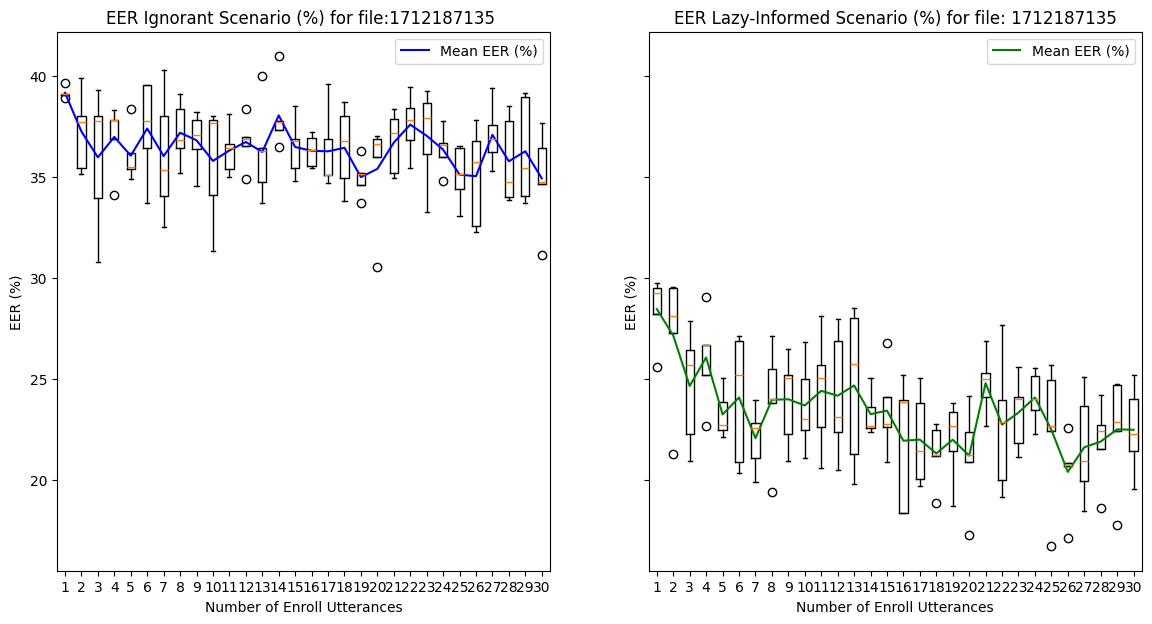

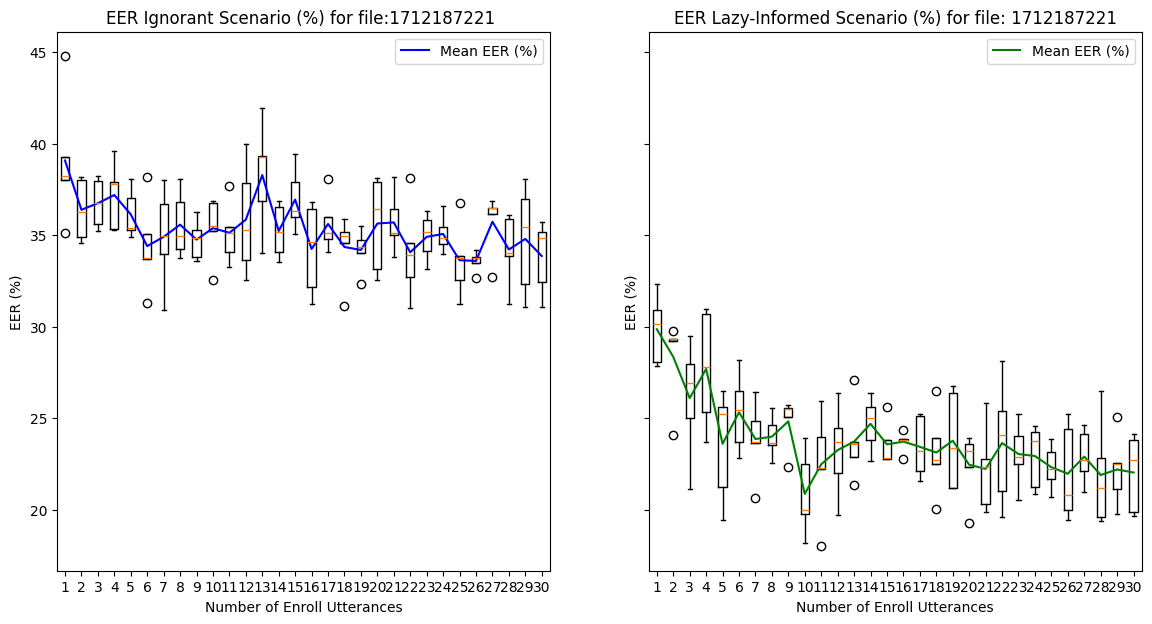

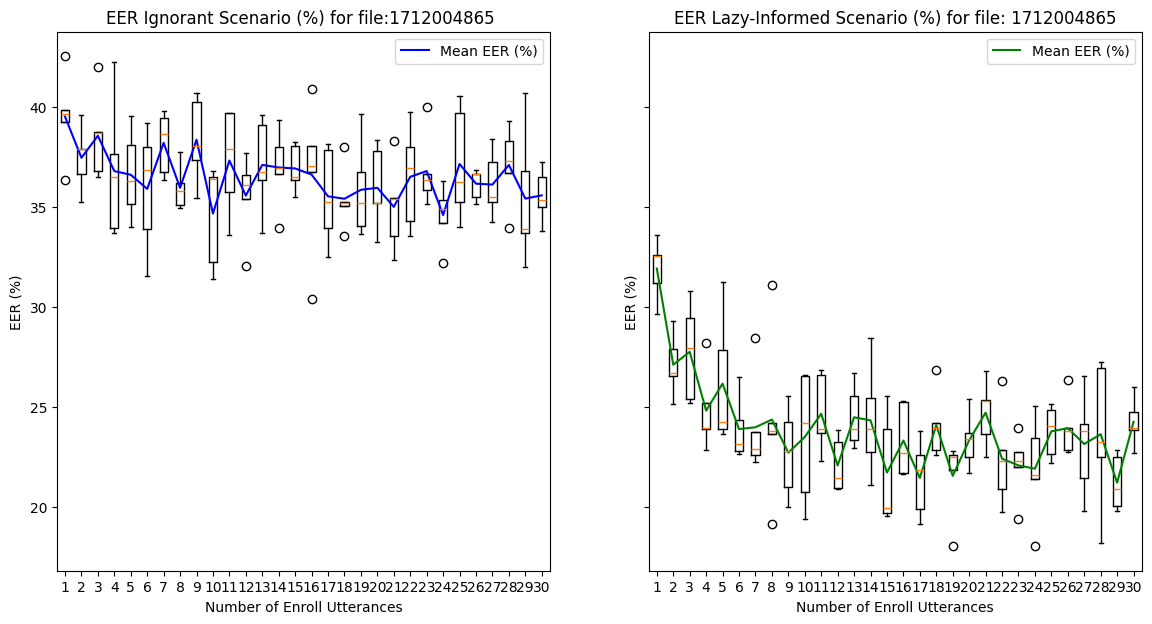

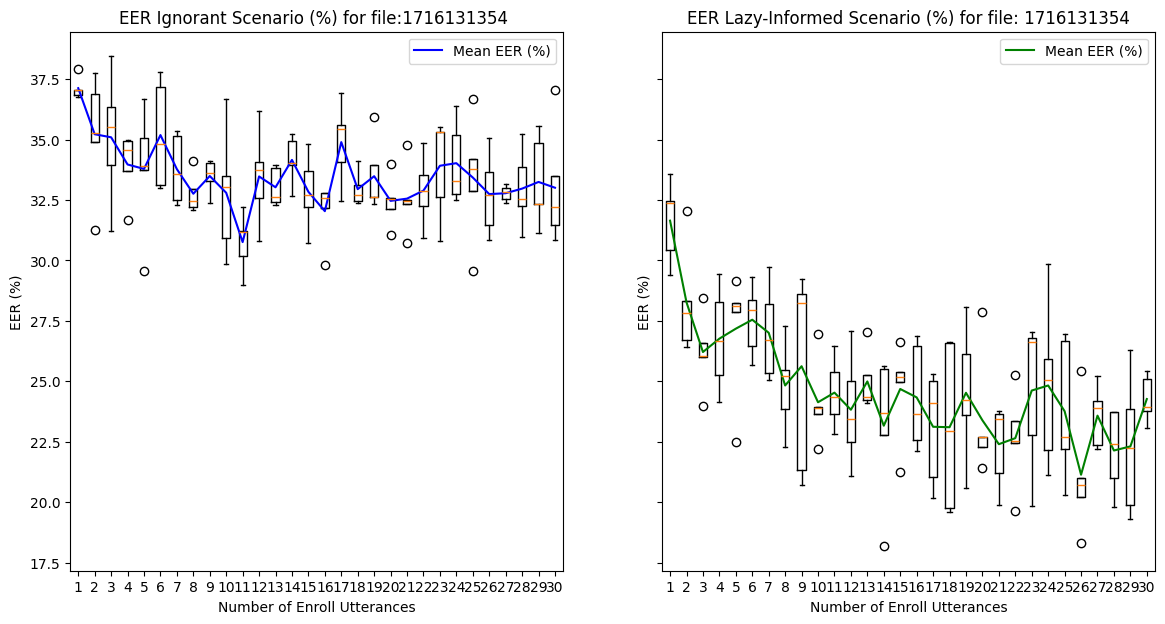

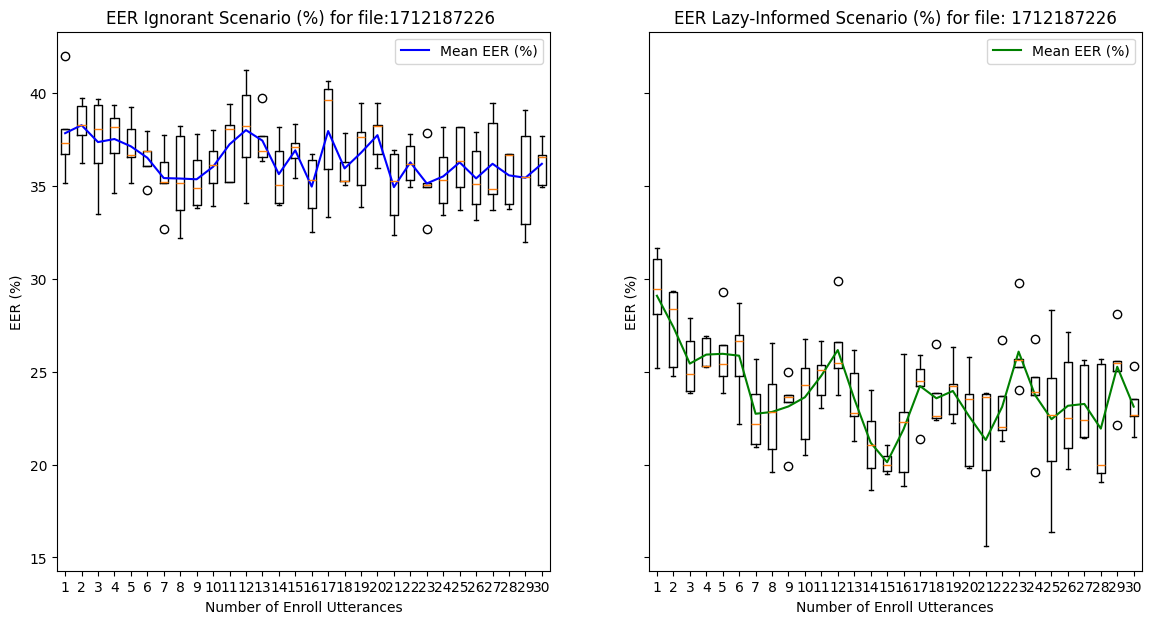

In [4]:
for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100
    # Adjusting EER values to percentages by multiplying by 100
    # Recalculating groups for plotting
    groups_ig_percent = df.groupby('num_of_enroll')['eer_ignorant'].apply(list)
    groups_lz_percent = df.groupby('num_of_enroll')['eer_lazy-informed'].apply(list)
    
    # Recalculating means for both scenarios across different numbers of enroll
    mean_ignorant_percent =df.groupby('num_of_enroll')['eer_ignorant'].mean()
    mean_lazy_informed_percent = df.groupby('num_of_enroll')['eer_lazy-informed'].mean()
    
    # Plotting updated data with mean lines reflecting EER percentages
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)
    
    # Ignorant scenario with mean line
    axs[0].boxplot(groups_ig_percent, labels=groups_ig_percent.index)
    axs[0].plot(range(1, len(mean_ignorant_percent) + 1), mean_ignorant_percent, color='blue', label='Mean EER (%)')
    axs[0].set_title(f"EER Ignorant Scenario (%) for file:{df['file'].iloc[0]} ")
    axs[0].set_xlabel('Number of Enroll Utterances')
    axs[0].set_ylabel('EER (%)')
    axs[0].legend()

    # Lazy-informed scenario with mean line
    axs[1].boxplot(groups_lz_percent, labels=groups_lz_percent.index)
    axs[1].plot(range(1, len(mean_ignorant_percent) + 1), mean_lazy_informed_percent, color='green', label='Mean EER (%)')
    axs[1].set_title(f"EER Lazy-Informed Scenario (%) for file: {df['file'].iloc[0]}")
    axs[1].set_xlabel('Number of Enroll Utterances')
    axs[1].set_ylabel('EER (%)')
    axs[1].legend()




##### Averaging over 5 different target selections


In [5]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [7]:
# Aggregate and calculate overall mean and standard deviation for each number of enroll
overall_stats = full_df.groupby('num_of_enroll').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

overall_stats.to_csv('overal_stats/overall_stats_stargan_lco_num_enrolls.csv', index=True)  # Set index=False if you do not want to include the DataFrame index as a column in the CSV file

# Display the overall statistics in a table
print("Overall statistics for ls-test-clean and other:")
display(overall_stats)

Overall statistics for ls-test-clean and other:


eer_ignorant           eer_lazy-informed          
                       mean       std              mean       std
num_of_enrolls                                                   
1                 38.546881  2.209491         30.198793  2.247385
2                 36.918712  2.010690         27.659960  2.298092
3                 36.748089  2.630800         26.033803  2.489122
4                 36.494165  2.383630         26.255936  2.275892
5                 35.945272  2.091782         25.235010  2.831749
6                 35.883702  2.419072         25.345272  2.487870
7                 35.671227  2.537789         23.936016  2.556680
8                 35.377465  2.132864         24.002414  2.632060
9                 35.758551  2.199211         24.062777  2.614639
10                34.937626  2.469926         23.166197  2.570564
11                35.353320  2.980034         24.178270  2.216084
12                35.927968  2.617203         23.903018  2.585424
13                36.418511  2.689652         24.288934  2.226079
14                36.011268  2.039764         23.328773  2.393197
15                36.022535  2.082634         22.709859  2.401271
16                34.834205  2.685093         23.047082  2.363763
17                36.054728  2.329332         22.851509  2.116736
18                35.022133  1.907538         23.044266  2.280030
19                35.065191  2.009615         23.165795  2.397567
20                35.441046  2.579168         22.598390  2.205709
21                34.980684  2.160034         23.095775  2.568899
22                35.466398  2.518177         22.915493  2.564819
23                35.559356  2.142568         23.835412  2.455579
24                35.113078  1.580348         23.505030  2.469612
25                35.121932  2.522326         22.963380  2.806701
26                34.590744  1.978569         22.125956  2.586835
27                35.584306  2.165174         22.906640  2.047873
28                35.128773  2.242921         22.305030  2.688956
29                35.036217  2.779729         22.703421  2.527903
30                34.716700  2.145470         23.235412  1.785091

In [10]:
full_df = full_df[(full_df['num_of_enroll'] % 5 == 0) | (full_df['num_of_enroll'] == 1)]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_enroll').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})

# Display the resulting statistics
display(overall_stats)

eer_ignorant           eer_lazy-informed          
                       mean       std              mean       std
num_of_enrolls                                                   
1                 38.546881  2.209491         30.198793  2.247385
5                 35.945272  2.091782         25.235010  2.831749
10                34.937626  2.469926         23.166197  2.570564
15                36.022535  2.082634         22.709859  2.401271
20                35.441046  2.579168         22.598390  2.205709
25                35.121932  2.522326         22.963380  2.806701
30                34.716700  2.145470         23.235412  1.785091

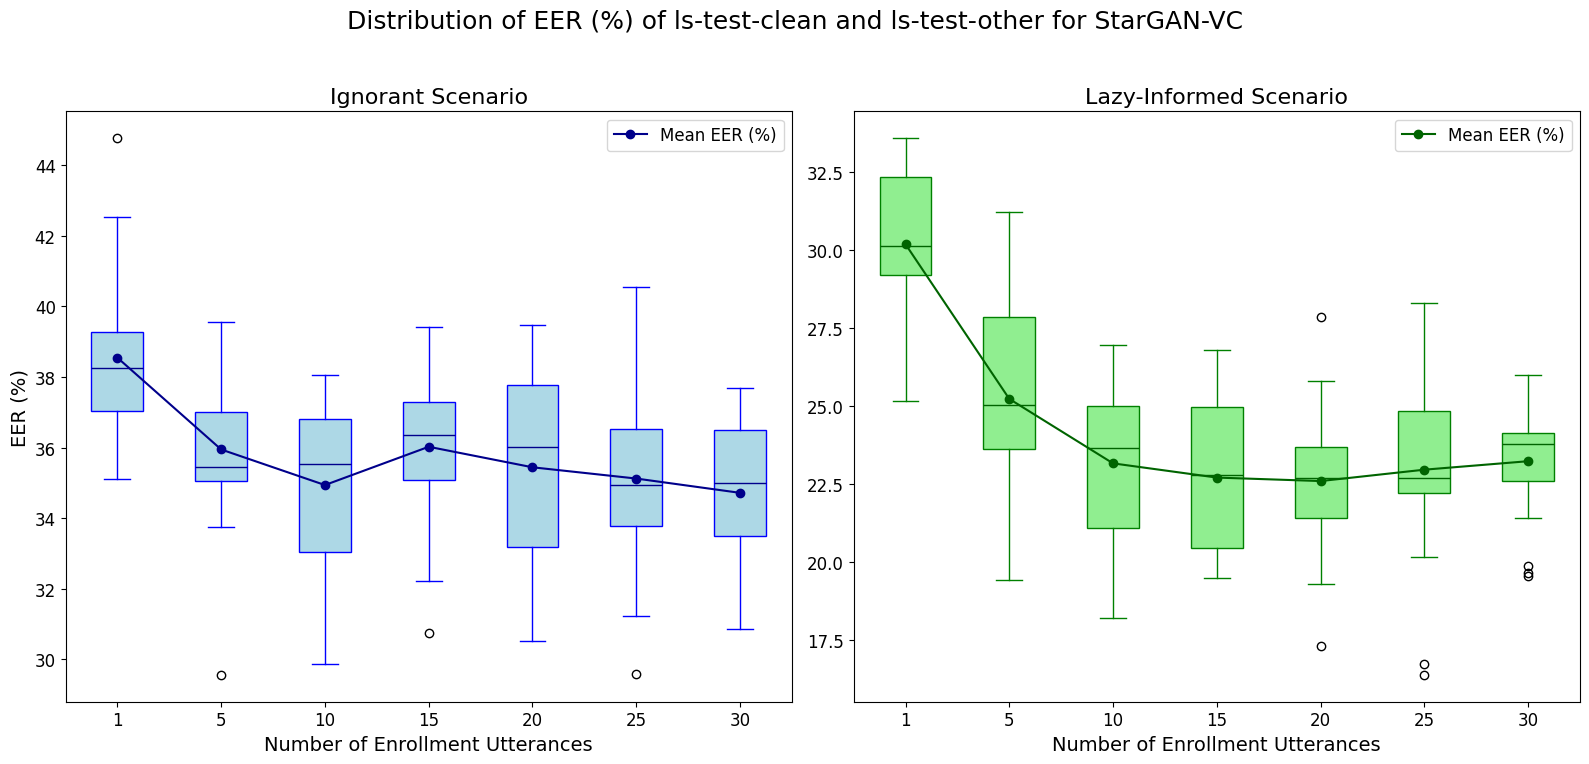

In [11]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# Customizing the overall appearance
plt.suptitle('Distribution of EER (%) of ls-test-clean and ls-test-other for StarGAN-VC', fontsize=18, fontweight='normal')

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_enroll')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_enroll')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightblue', color='blue'),
               medianprops=dict(color='darkblue'),
               whiskerprops=dict(color='blue'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('Number of Enrollment Utterances', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_enroll')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_enroll')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightgreen', color='green'),
               medianprops=dict(color='darkgreen'),
               whiskerprops=dict(color='green'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Lazy-Informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('Number of Enrollment Utterances', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('overal_stats/stargan_tco_enrolls.png')
plt.savefig('overal_stats/stargan_tco_enrolls.pdf')  
plt.show()




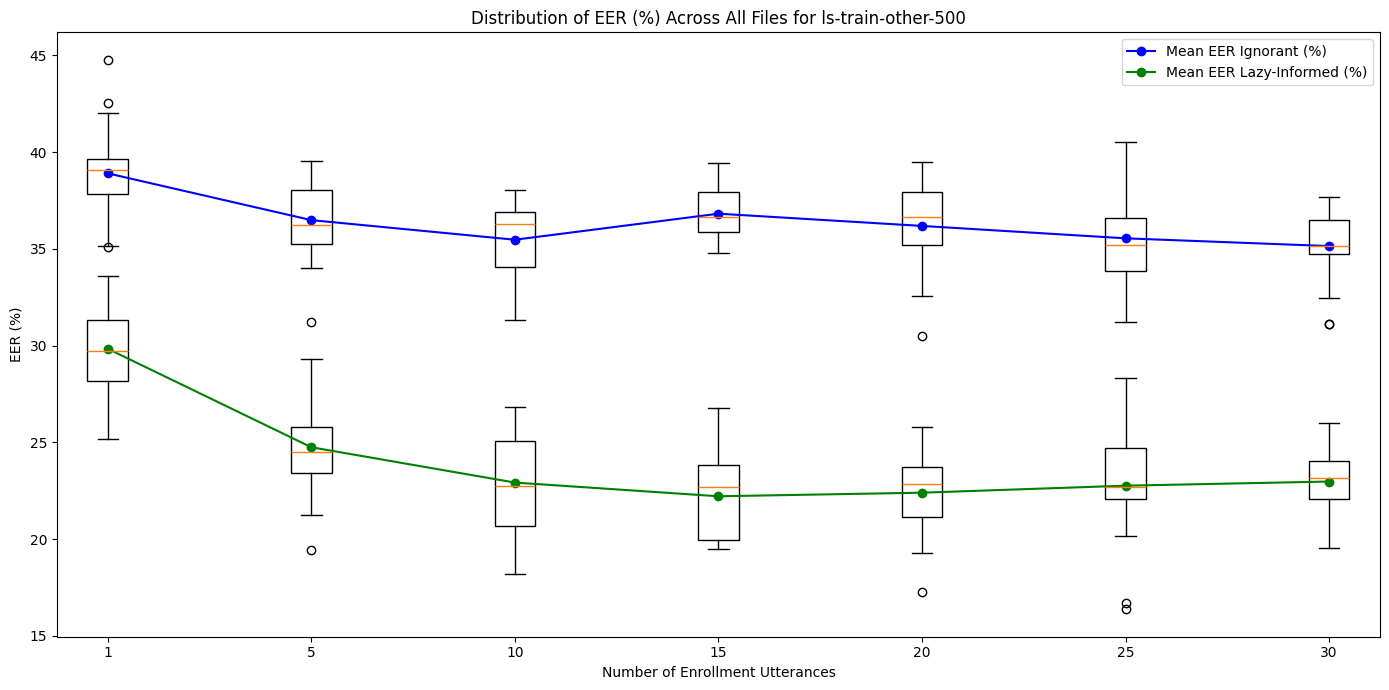

In [18]:
# Prepare data for plotting
ignorant_means = full_df.groupby('num_of_enroll')['eer_ignorant'].mean().values
lazy_informed_means = full_df.groupby('num_of_enroll')['eer_lazy-informed'].mean().values

# Getting unique number of enroll for plotting
unique_enroll = sorted(full_df['num_of_enroll'].unique())

# Prepare box plot data
ignorant_data = [full_df[full_df['num_of_enroll'] == speaker]['eer_ignorant'].values for speaker in unique_enroll]
lazy_informed_data = [full_df[full_df['num_of_enroll'] == speaker]['eer_lazy-informed'].values for speaker in unique_enroll]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 7))

# Position of bars on the x-axis
positions_ignorant = np.array(range(len(unique_enroll))) * 2.0 
positions_lazy_informed = np.array(range(len(unique_enroll))) * 2.0 

# Plotting box plots
bp_ignorant = ax.boxplot(ignorant_data, positions=positions_ignorant, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_enroll)
bp_lazy_informed = ax.boxplot(lazy_informed_data, positions=positions_lazy_informed, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_enroll)

# Plotting mean lines
ax.plot(positions_ignorant, ignorant_means, color='blue', marker='o', linestyle='-', label='Mean EER Ignorant (%)')
ax.plot(positions_lazy_informed , lazy_informed_means, color='green', marker='o', linestyle='-', label='Mean EER Lazy-Informed (%)')

# Customizing the plot
ax.set_title('Distribution of EER (%) Across All Files for ls-train-other-500')
ax.set_xlabel('Number of Enrollment Utterances')
ax.set_ylabel('EER (%)')
ax.legend()

plt.xticks(np.arange(min(positions_ignorant), max(positions_lazy_informed)+1, 2.0), labels=unique_enroll)
plt.tight_layout()
plt.show()


### 2. Evaluation with ls-train-other-500 (795 from the 1166 speakers)
The speakers with less than 120 utterances are filtered out from the dataset

In [12]:
file_pattern = "results_stargan_enroll/ls-train-other-500/stargan_to500_num_enrolls#*.txt" 

Individual Evaluation for different target selections

In [14]:
all_files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
dfs = []

for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    # Calculating mean and standard deviation for EER in both scenarios
    eer_ignorant_stats = df.groupby('num_of_enroll')['eer_ignorant'].agg(['mean', 'std'])
    eer_lazy_informed_stats = df.groupby('num_of_enroll')['eer_lazy-informed'].agg(['mean', 'std'])
    
     # Enhancing clarity by specifying scenario names
    eer_ignorant_stats.columns = pd.MultiIndex.from_product([['Ignorant'], eer_ignorant_stats.columns])
    eer_lazy_informed_stats.columns = pd.MultiIndex.from_product([['Lazy-Informed'], eer_lazy_informed_stats.columns])

    # Combining both stats into a single DataFrame for a unified table
    combined_stats = pd.concat([eer_ignorant_stats, eer_lazy_informed_stats], axis=1)

    print(f"\nStatistics for file: {df['file'].iloc[0]}")
    display(combined_stats)


Statistics for file: 1712189769


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1               30.229623  1.012020     22.345460  1.039744
2               29.222749  0.688202     19.469270  0.687559
3               28.845137  0.553492     17.897250  0.317396
4               28.617484  0.384182     16.398938  0.787831
5               28.430473  0.681884     16.877940  0.877072
6               28.422755  0.277895     16.610264  0.524364
7               28.301511  0.522004     15.559747  0.562134
8               28.165942  0.532979     15.935405  0.829005
9               28.293109  0.456356     16.006588  0.476755
10              27.903634  0.186285     15.931466  0.843698
11              27.504264  0.621977     16.048612  0.166952
12              28.074461  0.530740     15.876895  0.962799
13              27.976898  0.152265     15.868398  0.468569
14              28.152553  0.383813     15.417205  0.610034
15              28.281007  0.438279     15.420779  0.561484
16              28.237046  0.451686     15.452019  0.466185
17              28.292363  0.462855     15.440234  0.418555
18              28.497194  0.744222     15.252890  0.679442
19              27.657351  0.914043     15.607710  0.695079
20              28.104542  0.276019     15.846211  0.662375
21              27.931888  0.635277     15.197382  0.456582
22              27.655684  0.409053     15.541038  0.543006
23              27.864628  0.158093     15.204195  0.659740
24              27.845633  0.147771     15.132583  0.693138
25              28.114722  0.438127     15.083714  0.308859
26              27.943546  0.417857     15.097182  0.362358
27              28.000467  0.673357     14.762262  0.253222
28              28.244749  0.363507     15.447254  0.837485
29              28.123219  0.491653     15.152515  0.706973
30              28.310866  0.407717     15.306714  0.628875
31              27.970228  0.672385     14.957341  0.344457
32              28.269620  0.447548     14.791834  0.571945
33              28.006105  0.288477     15.183358  0.531683
34              27.808469  0.611567     15.419079  0.751301
35              28.058420  0.417069     15.560858  0.438830
36              28.300812  0.666708     15.029652  0.582922
37              28.126586  0.589007     15.203084  0.387783
38              27.848508  0.333653     14.807732  0.721814
39              27.844410  0.582679     14.957881  0.911044
40              27.544716  0.586504     15.079696  0.642705
41              28.010600  0.078649     15.177498  0.317933
42              27.695976  0.621369     14.799172  0.527869
43              27.894581  0.453501     14.960946  0.538067
44              28.234060  0.536459     15.232275  0.441968
45              28.181252  0.167632     14.692799  0.696681
46              27.897281  0.175323     15.594671  0.591299
47              28.093027  0.341374     14.610668  0.697011
48              27.384752  0.373477     15.392096  0.647993
49              27.797876  0.501494     14.885220  0.628770
50              27.837549  0.268068     14.934566  0.788573
55              27.754136  0.372024     15.123546  0.813077
60              28.002246  0.642850     15.236214  0.498206
65              27.965368  0.522678     14.981212  0.807488
70              27.878858  0.525752     15.454226  0.359841
75              28.047541  0.497137     14.740583  0.634647
80              27.712732  0.573699     14.573202  0.784809
85              27.760203  0.507447     15.388681  0.628912
90              27.419661  0.454677     15.617684  0.618695
95              28.182666  0.478355     14.794153  0.559273
100             28.288805  0.180963     14.758974  0.589680


Statistics for file: 1712189783


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1               30.204878  1.009727     22.293764  0.412276
2               28.779862  0.657403     18.744350  0.584116
3               28.464540  0.439683     17.089314  0.815973
4               27.804975  0.619624     16.420410  0.151058
5               27.468069  0.508507     15.684945  0.430499
6               27.784201  0.479860     15.609362  0.614248
7               28.066282  0.332875     15.428847  0.532673
8               27.696056  0.636986     15.435327  0.202959
9               27.655080  0.503422     15.587429  0.520292
10              27.643391  0.708537     15.103757  0.437696
11              28.072238  0.450078     14.603044  0.379638
12              27.388595  0.493714     15.074503  0.709983
13              27.341045  0.768697     15.259131  0.633727
14              27.408257  0.640088     14.825980  0.939501
15              27.286188  0.793108     15.136189  0.873067
16              27.565235  0.814324     14.669511  1.089370
17              27.541206  0.163686     15.332491  0.302449
18              27.190022  0.401571     15.325375  0.377151
19              27.326243  0.505577     14.929134  0.520073
20              27.678951  0.338914     14.654597  0.612445
21              27.377510  0.352751     14.892145  0.347312
22              27.356260  0.537888     15.150991  0.885419
23              27.347080  0.180765     14.558416  0.437158
24              27.587852  0.939859     14.661728  0.601690
25              27.586041  0.348227     14.727623  0.559461
26              28.084801  0.585053     14.432662  0.698586
27              27.307168  0.359009     14.003021  0.372458
28              27.784026  0.575440     14.756131  0.544274
29              27.165612  0.619973     14.447829  0.678379
30              27.293700  0.376030     14.597867  0.344065
31              27.207667  0.309258     15.067451  0.236998
32              27.058662  0.551038     14.361733  0.552389
33              27.514413  0.419185     15.420382  0.400109
34              27.421424  0.417412     14.283053  0.657271
35              26.991957  0.552107     14.015965  0.840425
36              27.499865  0.375707     15.215646  0.373459
37              26.998755  0.290638     14.214331  0.562540
38              27.392868  0.555283     14.745347  0.155318
39              27.624221  0.277254     15.071612  0.613651
40              27.858402  0.371916     14.448417  0.770225
41              27.273721  0.596541     14.579015  0.511401
42              27.626080  0.679298     14.058433  0.386608
43              26.935481  0.467600     14.220335  0.252085
44              27.160942  0.285302     14.189079  0.882178
45              27.377335  0.718312     14.368467  0.455962
46              27.039889  0.542007     14.760181  0.698987
47              27.221294  0.319547     14.260580  0.727669
48              27.076688  0.316853     14.346788  0.366418
49              27.671185  0.236475     14.743918  0.528607
50              27.284870  0.264027     14.534767  0.506927
55              26.904987  0.676706     14.323473  0.573143
60              27.575448  0.391850     14.176008  0.653831
65              27.328307  0.488458     14.073299  1.014416
70              27.612278  0.498216     14.241664  0.683545
75              27.447010  0.423686     14.415446  0.254219
80              27.711414  0.401131     14.127171  0.553568
85              27.156035  0.385210     14.527763  0.492225
90              27.456872  0.426816     14.240632  0.402854
95              27.467497  0.605734     14.138145  0.604427
100             27.056677  0.549175     14.450481  0.599613


Statistics for file: 1712099064


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1               29.695541  0.420383     22.261285  0.146430
2               28.603667  0.575527     19.771394  0.596130
3               27.679999  0.566042     17.700900  0.380605
4               27.943180  0.422451     17.305898  0.815831
5               27.339059  0.420527     16.573847  1.217093
6               27.422789  0.397767     16.640424  0.743131
7               27.019116  0.352547     15.935293  0.541190
8               26.847335  0.183881     16.862948  0.462173
9               27.578195  0.429187     16.166218  0.855518
10              27.265938  0.295940     15.765657  0.730249
11              27.020291  0.525195     15.535336  0.712128
12              26.701030  0.668743     15.365049  0.894619
13              27.116711  0.337173     16.056410  0.614816
14              26.678271  0.457875     15.911169  0.228685
15              26.715403  0.423118     15.643191  1.000499
16              26.605134  0.568394     15.230909  0.579662
17              26.988924  0.412004     15.420175  0.516226
18              27.148014  0.367611     15.343957  0.636795
19              26.362171  0.304716     15.202687  0.100670
20              26.818621  0.370801     15.137173  0.710150
21              26.659657  0.505304     15.150466  0.454813
22              26.531362  0.699273     15.588525  0.278134
23              27.009221  0.310731     15.291864  0.594886
24              27.193310  0.604137     14.888254  0.188303
25              26.703682  0.274023     15.083540  0.535774
26              26.496994  0.299496     15.279460  0.471229
27              26.602800  0.409025     15.186535  0.585823
28              26.774230  0.362192     15.179340  0.879250
29              26.618475  0.441765     15.155835  0.344711
30              26.743864  0.412532     14.919955  0.433022
31              26.967960  0.220453     15.339510  0.630344
32              26.993006  0.772081     15.135172  0.264946
33              26.822337  0.282467     14.959183  0.847059
34              26.675174  0.561057     15.042993  0.521008
35              26.699267  0.763603     15.046550  0.855311
36              26.242468  0.202236     15.149847  0.803850
37              26.636390  0.696649     15.255399  0.551300
38              26.961511  0.536854     15.280572  0.804374
39              26.435435  0.201545     15.030398  0.552608
40              26.698950  0.574778     15.189536  0.928382
41              26.503807  0.771656     14.857300  0.505892
42              26.615331  0.652293     15.607218  0.371674
43              26.406148  0.465550     15.224461  0.991751
44              26.091779  0.523757     14.707929  0.548088
45              26.603530  0.629539     14.469445  0.596379
46              26.943994  0.623766     14.950718  0.833751
47              26.885659  0.325827     15.109364  1.011783
48              26.180703  0.629727     15.178927  0.639427
49              26.151623  0.180297     15.106187  0.522513
50              26.382690  0.478180     14.765533  0.769763
55              26.901970  0.447282     14.719253  0.322716
60              27.085693  0.712849     15.022791  0.068050
65              26.395507  0.065747     14.717458  0.359927
70              26.628100  0.684048     14.845897  0.377907
75              26.572671  0.175017     14.396324  0.675663
80              26.888152  0.233034     14.821597  0.546399
85              26.767322  0.306155     14.236630  0.725878
90              26.633039  0.684473     15.103376  0.434796
95              26.803009  0.701126     14.711606  0.486052
100             26.847923  0.363418     14.937885  0.767273


Statistics for file: 1712189782


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1               30.031589  0.771020     22.026247  1.066771
2               28.857621  0.688682     19.002433  0.287200
3               27.915847  0.732066     17.764301  0.702274
4               27.811471  0.418725     16.816365  0.710367
5               27.900362  0.355322     16.675778  0.720582
6               28.049002  0.390320     16.227459  0.515175
7               27.447883  0.193372     15.890585  0.889883
8               27.625651  0.196314     15.739039  0.804783
9               27.710731  0.373135     15.254478  0.439254
10              27.537347  0.787755     15.479431  0.439325
11              27.529088  0.327743     14.992472  0.650835
12              27.311679  0.465088     15.326567  0.843388
13              27.533170  0.670066     15.373085  0.454374
14              26.992942  0.598857     14.292058  0.418176
15              27.065729  0.386653     15.445968  0.169632
16              27.763507  0.535326     15.658787  0.507147
17              27.213512  0.211928     15.471395  0.455524
18              27.371633  0.538589     14.827410  0.485855
19              27.051737  0.695003     15.006194  0.708258
20              27.853701  0.544098     14.735215  0.520603
21              27.185099  0.714996     14.930055  0.318262
22              27.638071  0.695946     14.949432  0.389250
23              27.498547  0.438535     14.774221  0.664912
24              27.173775  0.550996     14.721826  0.625936
25              27.472278  0.418594     14.894480  0.356624
26              27.366980  0.524376     14.421513  0.853810
27              26.973169  0.582773     15.219267  0.319310
28              27.623936  0.305912     14.899086  0.721901
29              27.057105  0.505960     14.400945  0.752156
30              27.432080  0.245766     14.779748  0.452716
31              27.167295  0.717305     14.905724  0.420109
32              27.229410  0.382508     14.900753  0.538834
33              27.355656  0.883945     15.197827  0.639116
34              27.238129  0.242929     15.111841  0.540090
35              27.206921  0.399060     15.010069  0.292110
36              27.180160  0.340952     14.473082  0.421557
37              27.326544  0.600626     14.416954  0.298890
38              27.221405  0.192434     14.582096  0.650987
39              27.023753  0.677572     14.683947  0.198930
40              27.520130  0.353086     14.482928  0.489128
41              27.166199  0.598340     15.014246  0.538135
42              26.999057  0.451914     14.907837  0.453707
43              27.091125  0.475609     14.595437  0.549297
44              27.278835  0.417238     15.376404  0.570593
45              27.250072  0.575629     14.776143  0.495025
46              27.150015  0.540837     15.181976  0.345678
47              27.285743  0.347604     14.770854  0.554825
48              27.215989  0.468980     14.865574  1.114559
49              27.452060  0.384703     15.309239  0.921891
50              27.549290  0.235768     14.762293  0.453185
55              27.250850  1.005401     14.798727  0.512952
60              26.814031  0.498286     14.715791  0.267696
65              26.937387  0.567733     14.554953  0.268962
70              27.184400  0.628019     14.292376  0.688317
75              27.360516  0.405263     14.684869  0.438600
80              27.120237  0.618679     14.793454  0.364795
85              27.151953  0.500268     14.733849  0.959491
90              27.486175  0.411221     14.293424  0.765384
95              27.209033  0.277532     14.727544  0.515533
100             27.383291  0.426040     14.864304  0.530210


Statistics for file: 1712189789


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1               31.233971  0.627201     22.880685  0.197972
2               29.544662  0.473882     19.549617  0.383848
3               29.313785  0.714858     18.617977  0.829392
4               29.528812  0.495343     17.517303  0.525790
5               29.040248  1.167382     17.680555  0.444138
6               28.796602  0.216374     16.735224  0.725001
7               28.645183  0.504935     17.050896  0.577380
8               28.923039  0.686343     16.197379  0.204816
9               28.671340  0.229549     16.187945  0.540033
10              28.694052  0.481120     16.317241  0.403715
11              28.837022  0.309034     16.105914  0.404865
12              28.614260  0.167973     16.575641  0.819642
13              27.850842  0.704246     15.904975  0.684132
14              28.519127  0.479800     15.981256  0.665230
15              28.995143  0.252362     16.161898  0.577007
16              28.332227  0.210471     15.921349  0.744603
17              28.357241  0.442337     15.977667  0.206092
18              28.330337  0.600397     15.707561  0.528291
19              28.808625  0.344361     15.658771  0.683910
20              28.112705  0.228013     15.670159  0.344425
21              28.630301  0.446605     15.706862  0.413379
22              28.679726  0.195616     15.830329  0.619600
23              28.664352  0.228726     15.502698  0.452984
24              28.486854  0.438515     15.506224  0.329389
25              28.234044  0.738681     15.913662  0.738401
26              28.146693  0.712597     15.612523  0.369916
27              28.202344  0.390244     15.337843  0.308312
28              28.704883  0.518250     15.729716  0.582721
29              28.578065  0.691911     15.913869  0.433281
30              28.235188  0.428877     15.507669  0.153832
31              28.730882  0.377022     15.934483  0.882710
32              28.496384  0.362638     15.639840  0.777910
33              28.404585  0.711156     15.707815  0.522705
34              28.630952  0.667837     15.701478  0.369838
35              28.427106  0.197008     15.434961  0.566465
36              28.384876  0.333835     15.470617  0.675739
37              28.346441  0.570128     15.363873  0.421792
38              28.567980  0.268027     15.696872  0.401457
39              28.296079  0.658735     15.162076  0.411766
40              28.664733  0.403426     15.518152  0.527285
41              28.656379  0.365940     15.813637  0.598197
42              28.755340  0.571687     15.275950  0.768810
43              28.266793  0.501813     15.433214  0.212593
44              28.637448  0.906932     15.057191  0.640312
45              28.802939  0.322250     16.044657  0.195836
46              28.277434  0.737295     15.396289  0.227583
47              28.035614  0.438695     15.480352  0.720335
48              28.830780  0.495998     15.539624  0.331755
49              28.750115  0.652384     15.628135  0.541519
50              28.293078  0.519098     15.492200  0.739563
55              28.496717  0.662005     15.353185  0.357567
60              28.318902  0.469649     15.178625  0.984898
65              28.451215  0.372227     15.274473  0.596721
70              28.388767  0.641032     15.493391  0.457494
75              28.092027  0.760579     15.708418  0.831234
80              28.371154  0.358691     15.118178  0.913509
85              28.399456  0.342640     14.824456  0.952448
90              28.700563  0.643822     14.972111  0.717070
95              28.573570  0.634797     15.521662  0.878830
100             28.315440  0.588899     15.112747  0.596629

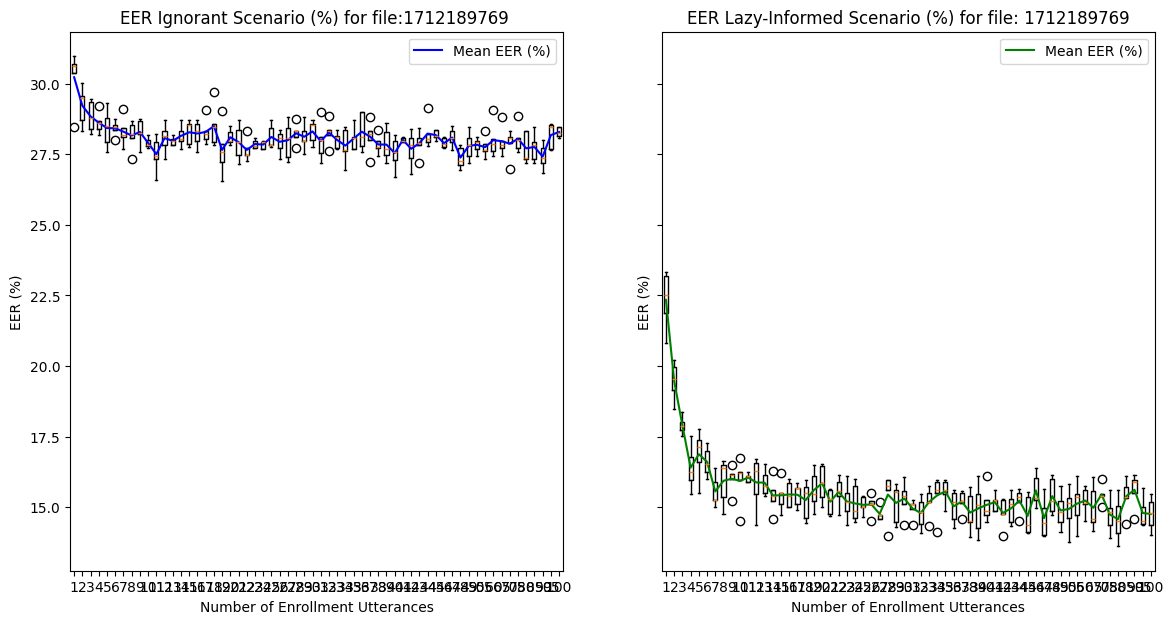

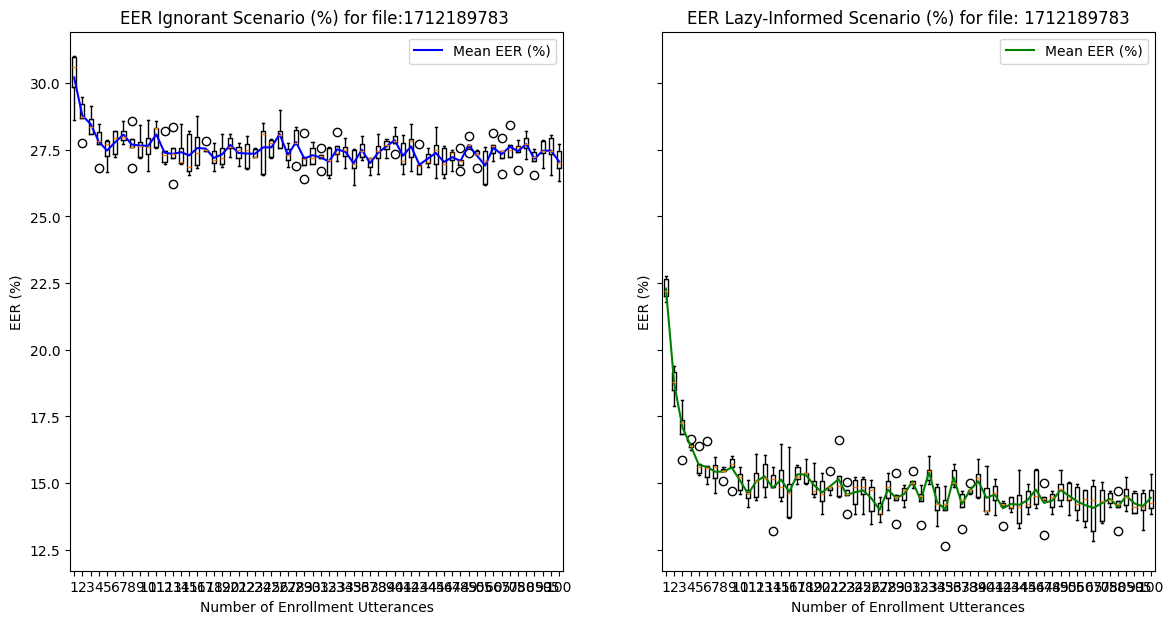

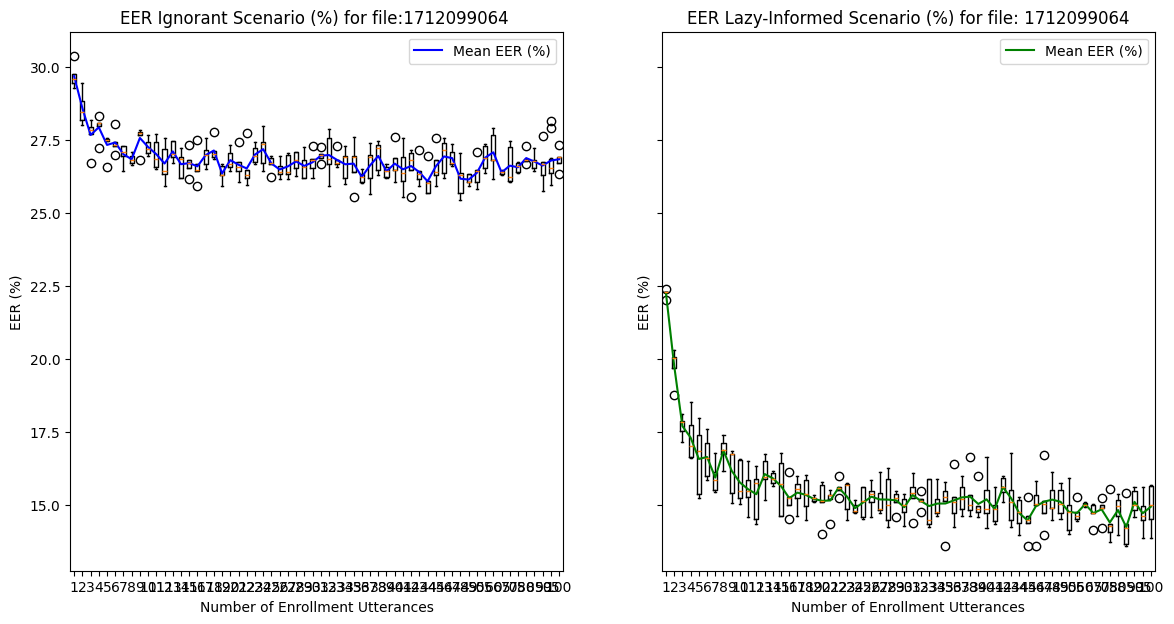

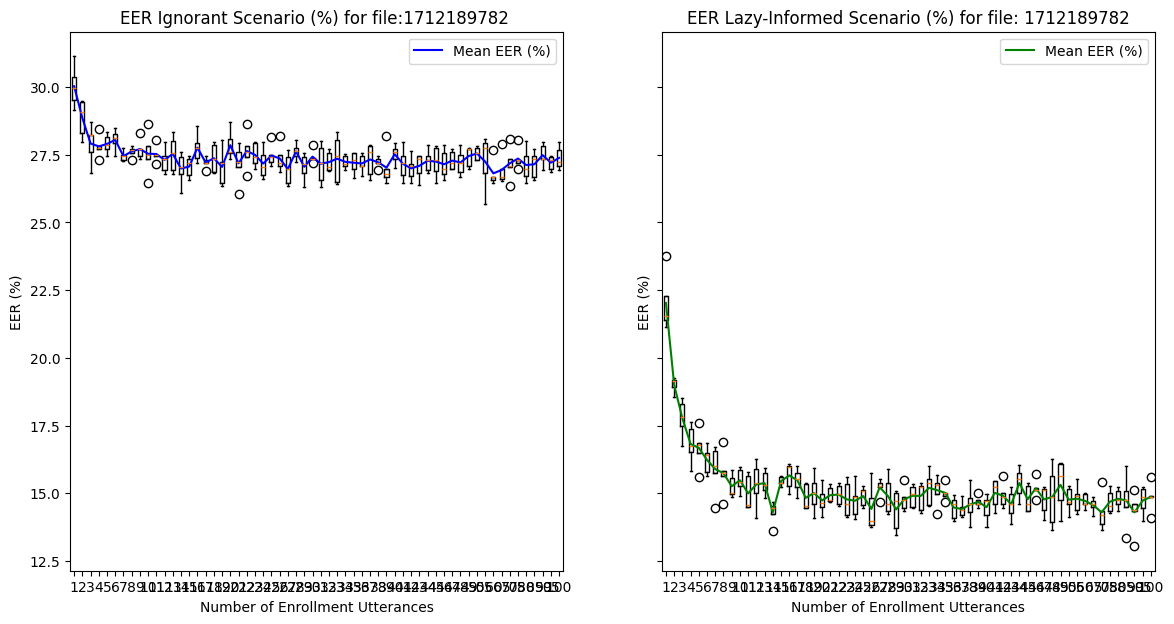

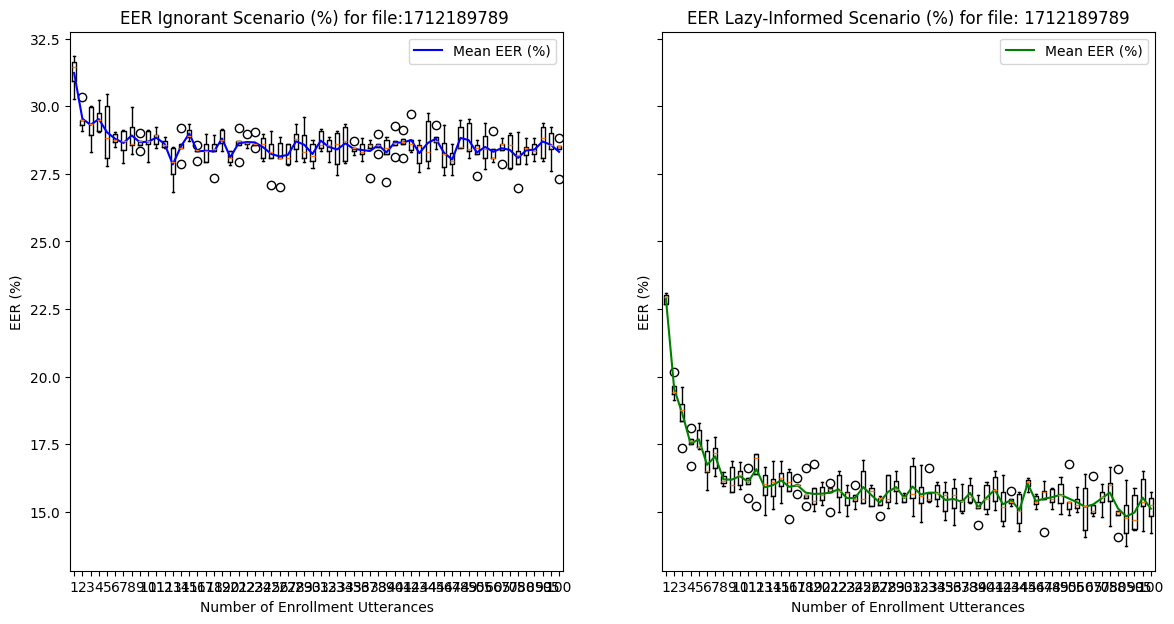

In [16]:
for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    # Adjusting EER values to percentages by multiplying by 100
    # Recalculating groups for plotting
    groups_ig_percent = df.groupby('num_of_enroll')['eer_ignorant'].apply(list)
    groups_lz_percent = df.groupby('num_of_enroll')['eer_lazy-informed'].apply(list)
    
    # Recalculating means for both scenarios across different numbers of enrolls
    mean_ignorant_percent =df.groupby('num_of_enroll')['eer_ignorant'].mean()
    mean_lazy_informed_percent = df.groupby('num_of_enroll')['eer_lazy-informed'].mean()
    
    # Plotting updated data with mean lines reflecting EER percentages
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)
    
    # Ignorant scenario with mean line
    axs[0].boxplot(groups_ig_percent, labels=groups_ig_percent.index)
    axs[0].plot(range(1, len(mean_ignorant_percent) + 1), mean_ignorant_percent, color='blue', label='Mean EER (%)')
    axs[0].set_title(f"EER Ignorant Scenario (%) for file:{df['file'].iloc[0]} ")
    axs[0].set_xlabel('Number of Enrollment Utterances')
    axs[0].set_ylabel('EER (%)')
    axs[0].legend()

    # Lazy-informed scenario with mean line
    axs[1].boxplot(groups_lz_percent, labels=groups_lz_percent.index)
    axs[1].plot(range(1, len(mean_ignorant_percent) + 1), mean_lazy_informed_percent, color='green', label='Mean EER (%)')
    axs[1].set_title(f"EER Lazy-Informed Scenario (%) for file: {df['file'].iloc[0]}")
    axs[1].set_xlabel('Number of Enrollment Utterances')
    axs[1].set_ylabel('EER (%)')
    axs[1].legend()


Averaging over 5 different target selections

In [17]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [19]:
# Aggregate and calculate overall mean and standard deviation for each number of enroll
overall_stats = full_df.groupby('num_of_enroll').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

# Display the overall statistics in a table
print("Overall Statistics for ls-train-other-500:")
display(overall_stats)

Overall Statistics for ls-train-other-500:


eer_ignorant           eer_lazy-informed          
                       mean       std              mean       std
num_of_enrolls                                                   
1                 30.279121  0.900021         22.361488  0.700681
2                 29.001712  0.664702         19.307413  0.617368
3                 28.443862  0.825898         17.813948  0.772945
4                 28.341184  0.805951         16.891783  0.750786
5                 28.035642  0.901657         16.698613  0.974882
6                 28.095070  0.591986         16.364547  0.715805
7                 27.895995  0.701842         15.973074  0.823010
8                 27.851605  0.831311         16.034019  0.717971
9                 27.981691  0.574774         15.840532  0.650873
10                27.808872  0.702597         15.719510  0.688485
11                27.792581  0.760015         15.457076  0.754922
12                27.618005  0.811625         15.643731  0.948322
13                27.563733  0.619419         15.692400  0.618681
14                27.550230  0.851102         15.285534  0.869695
15                27.668694  0.970792         15.561605  0.726488
16                27.700630  0.806991         15.386515  0.783174
17                27.678649  0.656566         15.528392  0.430470
18                27.707440  0.778060         15.291439  0.579782
19                27.441225  0.986810         15.280899  0.619374
20                27.713704  0.590762         15.208671  0.724847
21                27.556891  0.849446         15.175382  0.472246
22                27.572220  0.859080         15.412063  0.622192
23                27.676766  0.631759         15.066279  0.630086
24                27.657485  0.734616         14.982123  0.573570
25                27.622154  0.702930         15.140604  0.634023
26                27.607803  0.795041         14.968668  0.718811
27                27.417189  0.766809         14.901785  0.611301
28                27.826365  0.772157         15.202305  0.754821
29                27.508495  0.899086         15.014199  0.792057
30                27.603140  0.698428         15.022391  0.522397
31                27.608806  0.811200         15.240902  0.635064
32                27.609416  0.810423         14.965866  0.670938
33                27.620619  0.761386         15.293713  0.611417
34                27.554830  0.817606         15.111689  0.720359
35                27.476734  0.811604         15.013681  0.803992
36                27.521636  0.888473         15.067769  0.638001
37                27.486943  0.843775         14.890728  0.640116
38                27.598454  0.684049         15.022524  0.686167
39                27.444780  0.815563         14.981183  0.560704
40                27.657386  0.775319         14.943746  0.760336
41                27.522141  0.902547         15.088339  0.623341
42                27.538357  0.924175         14.929722  0.713863
43                27.318826  0.811015         14.886879  0.691314
44                27.480613  1.049783         14.912576  0.723306
45                27.643026  0.917550         14.870302  0.776997
46                27.461723  0.741340         15.176767  0.614278
47                27.504268  0.586292         14.846363  0.812417
48                27.337782  0.972004         15.064602  0.757339
49                27.564572  0.936662         15.134540  0.671200
50                27.469495  0.734786         14.897872  0.692409
55                27.461732  0.868529         14.863637  0.614378
60                27.559264  0.762157         14.865886  0.667028
65                27.415557  0.845728         14.720279  0.737729
70                27.538481  0.821173         14.865511  0.735550
75                27.503953  0.720594         14.789128  0.735704
80                27.560738  0.676018         14.686720  0.691091
85                27.446994  0.697133         14.742276  0.806271
90                27.539262  0.834988         14.845446

In [24]:
# Incrementing by 1 till 10, and by 5 thereafter
condition = (
    (full_df['num_of_enroll'] % 5 == 0)  # Includes multiples of 5
)

# Apply the condition to filter the DataFrame
full_df = full_df[condition]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_enroll').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})
overall_stats.to_csv('overal_stats/overall_stats_stargan_to500_enrolls.csv', index=True)  # Set index=False if you do not want to include the DataFrame index as a column in the CSV file

# Display the resulting statistics
display(overall_stats)


eer_ignorant           eer_lazy-informed          
                       mean       std              mean       std
num_of_enrolls                                                   
5                 28.035642  0.901657         16.698613  0.974882
10                27.808872  0.702597         15.719510  0.688485
15                27.668694  0.970792         15.561605  0.726488
20                27.713704  0.590762         15.208671  0.724847
25                27.622154  0.702930         15.140604  0.634023
30                27.603140  0.698428         15.022391  0.522397
35                27.476734  0.811604         15.013681  0.803992
40                27.657386  0.775319         14.943746  0.760336
45                27.643026  0.917550         14.870302  0.776997
50                27.469495  0.734786         14.897872  0.692409
55                27.461732  0.868529         14.863637  0.614378
60                27.559264  0.762157         14.865886  0.667028
65                27.415557  0.845728         14.720279  0.737729
70                27.538481  0.821173         14.865511  0.735550
75                27.503953  0.720594         14.789128  0.735704
80                27.560738  0.676018         14.686720  0.691091
85                27.446994  0.697133         14.742276  0.806271
90                27.539262  0.834988         14.845446  0.766044
95                27.506464  0.873071         14.767453  0.691280
100               27.578427  0.748268         14.824878  0.610354

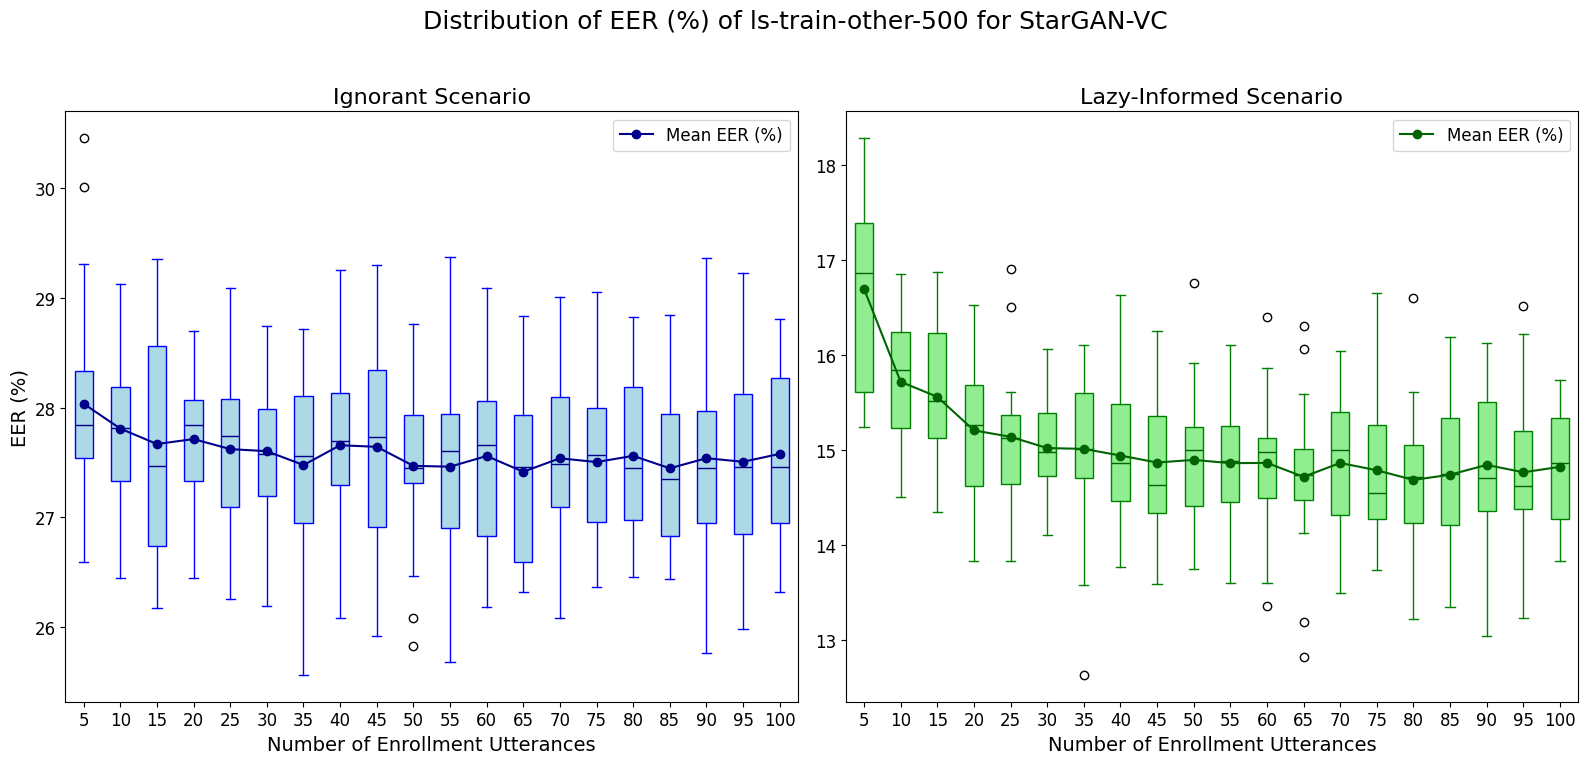

In [25]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# Customizing the overall appearance
plt.suptitle('Distribution of EER (%) of ls-train-other-500 for StarGAN-VC', fontsize=18, fontweight='normal')

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_enroll')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_enroll')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightblue', color='blue'),
               medianprops=dict(color='darkblue'),
               whiskerprops=dict(color='blue'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('Number of Enrollment Utterances', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_enroll')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_enroll')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightgreen', color='green'),
               medianprops=dict(color='darkgreen'),
               whiskerprops=dict(color='green'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Lazy-Informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('Number of Enrollment Utterances', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('overal_stats/stargan_to500_enrolls.png')
plt.savefig('overal_stats/stargan_to500_enrolls.pdf')  
plt.show()

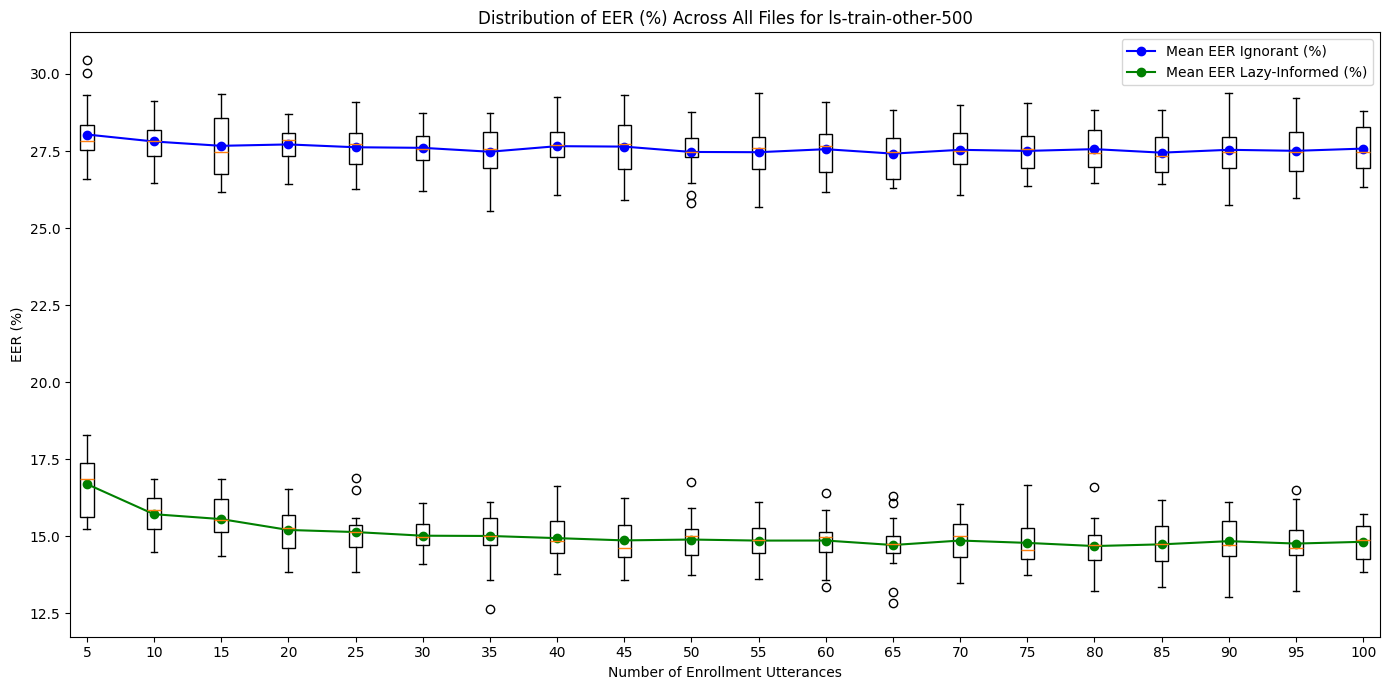

In [28]:
# Prepare data for plotting
ignorant_means = full_df.groupby('num_of_enroll')['eer_ignorant'].mean().values
lazy_informed_means = full_df.groupby('num_of_enroll')['eer_lazy-informed'].mean().values

# Getting unique number of enroll for plotting
unique_enroll = sorted(full_df['num_of_enroll'].unique())

# Prepare box plot data
ignorant_data = [full_df[full_df['num_of_enroll'] == speaker]['eer_ignorant'].values for speaker in unique_enroll]
lazy_informed_data = [full_df[full_df['num_of_enroll'] == speaker]['eer_lazy-informed'].values for speaker in unique_enroll]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 7))

# Position of bars on the x-axis
positions_ignorant = np.array(range(len(unique_enroll))) * 2.0 
positions_lazy_informed = np.array(range(len(unique_enroll))) * 2.0 

# Plotting box plots
bp_ignorant = ax.boxplot(ignorant_data, positions=positions_ignorant, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_enroll)
bp_lazy_informed = ax.boxplot(lazy_informed_data, positions=positions_lazy_informed, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_enroll)

# Plotting mean lines
ax.plot(positions_ignorant, ignorant_means, color='blue', marker='o', linestyle='-', label='Mean EER Ignorant (%)')
ax.plot(positions_lazy_informed , lazy_informed_means, color='green', marker='o', linestyle='-', label='Mean EER Lazy-Informed (%)')

# Customizing the plot
ax.set_title('Distribution of EER (%) Across All Files for ls-train-other-500')
ax.set_xlabel('Number of Enrollment Utterances')
ax.set_ylabel('EER (%)')
ax.legend()

plt.xticks(np.arange(min(positions_ignorant), max(positions_lazy_informed)+1, 2.0), labels=unique_enroll)
plt.tight_layout()
plt.show()

# Experimentation with the kNN-VC model


### 1. Evaluation with ls-test-clean and ls-test-other (71 out of 73 speakers)
The speakers with less than 30 utterances are filtered out. We run the experiments for 5 different target selections (files).

In [29]:
file_pattern = "results_knnvc_enroll/ls-test-clean_other/knnvc_tco_num_enrolls#*.txt" 

Individual Evaluation for different target selections

In [30]:
all_files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
dfs = []

for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    # Calculating mean and standard deviation for EER in both scenarios
    eer_ignorant_stats = df.groupby('num_of_enroll')['eer_ignorant'].agg(['mean', 'std'])
    eer_lazy_informed_stats = df.groupby('num_of_enroll')['eer_lazy-informed'].agg(['mean', 'std'])
    
     # Enhancing clarity by specifying scenario names
    eer_ignorant_stats.columns = pd.MultiIndex.from_product([['Ignorant'], eer_ignorant_stats.columns])
    eer_lazy_informed_stats.columns = pd.MultiIndex.from_product([['Lazy-Informed'], eer_lazy_informed_stats.columns])

    # Combining both stats into a single DataFrame for a unified table
    combined_stats = pd.concat([eer_ignorant_stats, eer_lazy_informed_stats], axis=1)

    print(f"\nStatistics for file: {df['file'].iloc[0]}")
    display(combined_stats)


Statistics for file: 1712524706


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_enroll                                             
1              44.969819  1.426710     24.321932  2.672618
2              44.899396  1.684743     18.020121  3.849672
3              43.372233  1.995954     14.925553  2.525748
4              44.454728  1.662022     14.229376  3.359601
5              43.098592  1.717996     13.545272  2.414137
6              42.871227  2.369409     11.845070  3.860359
7              42.394366  1.361219     12.724346  1.622097
8              43.167002  0.955348     11.553320  1.801263
9              43.223340  2.408796     13.535211  2.359553
10             42.822938  1.166104     11.569416  1.285248
11             42.490946  1.916342     12.509054  2.431411
12             43.164990  0.732841     11.871227  0.678720
13             43.058350  1.492583     11.897384  2.079718
14             44.344064  3.310772     10.845070  0.778200
15             44.583501  2.633227     11.217304  1.244154
16             43.362173  0.539211     12.788732  1.676106
17             44.006036  1.469268     11.649899  2.746433
18             43.299799  1.159629     11.734406  1.656750
19             43.400402  1.761469     11.239437  0.918952
20             44.722334  1.722374     12.030181  1.931857
21             43.285714  1.159489      9.599598  1.530984
22             44.032193  2.623647     10.706237  0.914010
23             42.985915  1.314705     10.865191  1.635931
24             43.919517  1.768402     10.152918  0.979489
25             44.285714  1.102379     11.150905  1.514253
26             43.830986  2.986618     10.016097  2.378245
27             44.187123  0.959919     11.661972  1.501109
28             42.388330  1.558522     11.148893  1.352256
29             43.211268  1.373514     10.969819  1.966815
30             43.078471  1.432127     12.185111  1.968124


Statistics for file: 1712506146


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_enroll                                             
1              44.251509  1.883581     23.088531  2.339591
2              43.591549  1.058970     19.420523  2.658588
3              41.951710  1.254705     18.539235  1.706609
4              43.301811  1.711938     13.118712  1.481130
5              42.790744  1.121642     15.279678  1.642143
6              43.899396  0.815467     13.420523  2.968617
7              44.672032  1.250758     14.034205  2.469107
8              41.440644  1.074091     13.985915  2.821841
9              41.515091  3.069157     11.830986  2.141711
10             44.494970  1.968947     14.997988  2.572163
11             43.476861  1.720301     13.541247  3.191395
12             44.953722  1.240969     14.327968  2.150688
13             43.589537  1.331078     14.160966  2.058354
14             42.676056  0.384603     12.923541  0.589738
15             42.965795  1.081721     12.885312  1.331078
16             44.639839  2.554950     12.808853  1.427693
17             43.241449  1.152107     12.716298  1.835141
18             42.913481  1.909437     14.018109  0.927727
19             42.404427  1.620093     11.774648  1.292641
20             42.794769  1.289717     12.299799  1.514203
21             42.225352  0.871061     12.665996  1.046834
22             41.943662  0.922388     11.072435  1.925313
23             42.885312  0.599517     11.967807  0.701944
24             44.094567  1.881799     12.895372  1.690895
25             43.488934  1.145301     11.024145  1.772215
26             41.692153  0.931641     12.482897  1.736140
27             41.808853  2.131318     13.006036  1.743978
28             42.016097  0.360815     11.521127  1.351845
29             42.325956  1.299431     12.492958  1.103306
30             42.786720  1.787095     13.460765  1.342371


Statistics for file: 1712514147


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_enroll                                             
1              47.927565  1.422697     22.686117  3.701591
2              48.824950  3.399177     19.146881  2.052738
3              47.869215  2.390531     17.941650  3.091549
4              48.961771  2.347219     14.501006  1.930156
5              49.670020  2.748481     14.881288  4.864627
6              48.521127  2.590470     15.655936  0.957306
7              48.507042  2.373314     15.118712  2.362808
8              48.559356  2.870320     13.420523  1.378912
9              46.979879  1.371246     12.641851  2.611682
10             49.720322  1.820111     13.780684  2.248512
11             48.360161  1.500243     11.881288  1.164028
12             49.181087  0.940055     13.368209  1.168116
13             48.454728  1.511996     14.183099  1.478024
14             49.853119  1.019592     13.267606  0.933106
15             47.641851  1.779698     13.609658  2.311514
16             49.553320  1.794789     13.849095  1.062990
17             48.975855  1.893466     10.847082  0.895920
18             49.758551  2.024821     11.591549  1.214857
19             49.927565  2.581541     11.555332  1.659146
20             48.784708  1.316051     10.804829  1.077798
21             49.690141  1.168138     11.233400  1.099635
22             48.519115  1.888180     11.245473  2.123730
23             47.668008  1.311198     11.470825  1.591612
24             49.551308  1.950720     12.094567  1.754840
25             47.929577  1.808200     11.231388  1.780849
26             47.615694  1.446892      9.629779  2.410474
27             49.072435  1.389540     11.605634  1.044889
28             49.114688  1.326748     10.452716  1.155256
29             49.708249  0.613806     10.146881  0.786628
30             49.784708  1.385604     10.841046  1.266559


Statistics for file: 1712444243


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_enroll                                             
1              45.100604  3.050779     23.517103  1.832445
2              46.193159  1.423845     19.849095  3.093426
3              43.130785  2.583236     16.698189  2.852582
4              44.927565  1.782877     13.915493  1.134914
5              42.778672  1.947679     14.148893  1.322959
6              45.237425  1.352896     14.525151  1.492301
7              44.150905  1.331955     14.225352  1.701347
8              43.227364  0.864998     12.814889  1.832953
9              43.362173  2.398203     12.925553  1.717693
10             43.486922  2.705420     14.167002  2.031364
11             42.587525  1.863550     12.845070  2.183949
12             43.466801  1.492864     13.885312  2.373493
13             44.193159  2.001423     12.209256  0.743773
14             43.543260  0.676270     12.478873  3.746331
15             45.649899  1.469770     10.571429  3.482087
16             43.458753  1.512193     12.018109  1.590486
17             43.742455  2.056686     12.730382  2.064221
18             43.380282  1.461023     11.577465  0.861481
19             42.468813  1.941684     11.995976  1.351998
20             45.700201  1.247659     12.211268  1.278941
21             44.494970  2.914081     11.327968  1.133209
22             43.016097  1.957424     11.873239  3.396213
23             42.603622  2.049555     10.877264  0.959761
24             43.432596  2.398024     11.744467  1.503151
25             42.205231  1.334248     11.788732  1.153994
26             44.672032  2.327921     12.175050  0.821920
27             44.404427  2.316762     11.422535  2.188766
28             42.515091  1.042741     11.706237  1.024987
29             43.317907  1.822875     11.299799  2.543595
30             43.340040  1.946895     11.682093  1.386787


Statistics for file: 1711712351


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_enroll                                             
1              44.164990  1.532266     21.064386  1.933519
2              46.492958  1.485950     20.555332  3.044398
3              45.619718  2.754855     15.818913  0.648702
4              45.593561  2.233253     15.052314  3.491811
5              45.191147  2.449259     14.319920  1.991197
6              44.756539  1.223635     14.261569  2.355217
7              44.124748  2.661009     12.535211  1.736032
8              45.315895  1.567862     13.567404  3.072931
9              46.084507  4.141855     13.627767  3.309382
10             44.798793  1.503494     13.386318  1.707516
11             46.327968  2.210076     13.835010  3.036617
12             47.134809  2.607337     12.665996  1.455888
13             45.631791  1.735396     11.925553  1.463542
14             44.853119  0.986675     11.617706  1.674535
15             46.388330  0.917536     11.235412  2.375848
16             44.935614  1.357340     11.800805  0.628551
17             45.571429  3.121108     12.841046  1.241886
18             44.325956  1.500428     10.746479  2.921989
19             46.698189  1.858220     11.561368  1.178918
20             45.923541  2.197163     11.585513  2.170599
21             47.018109  2.532081     10.810865  1.272200
22             45.824950  2.194059     13.480885  3.357577
23             44.845070  2.274706     13.327968  1.872274
24             45.458753  0.982795     12.382294  1.726699
25             45.490946  1.700222     11.346076  1.164276
26             44.195171  1.350058     10.247485  3.152657
27             47.050302  2.217305     11.535211  1.890767
28             45.319920  3.150359     11.897384  2.382561
29             46.311871  3.042412     12.490946  1.243475
30             45.494970  1.840516     13.281690  2.300090

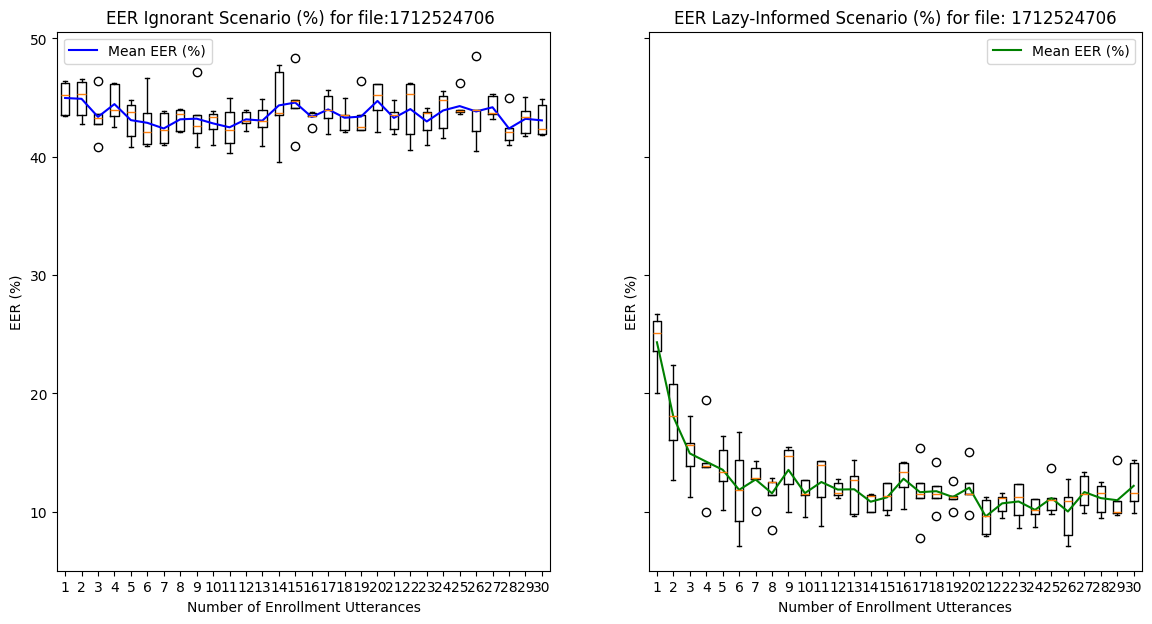

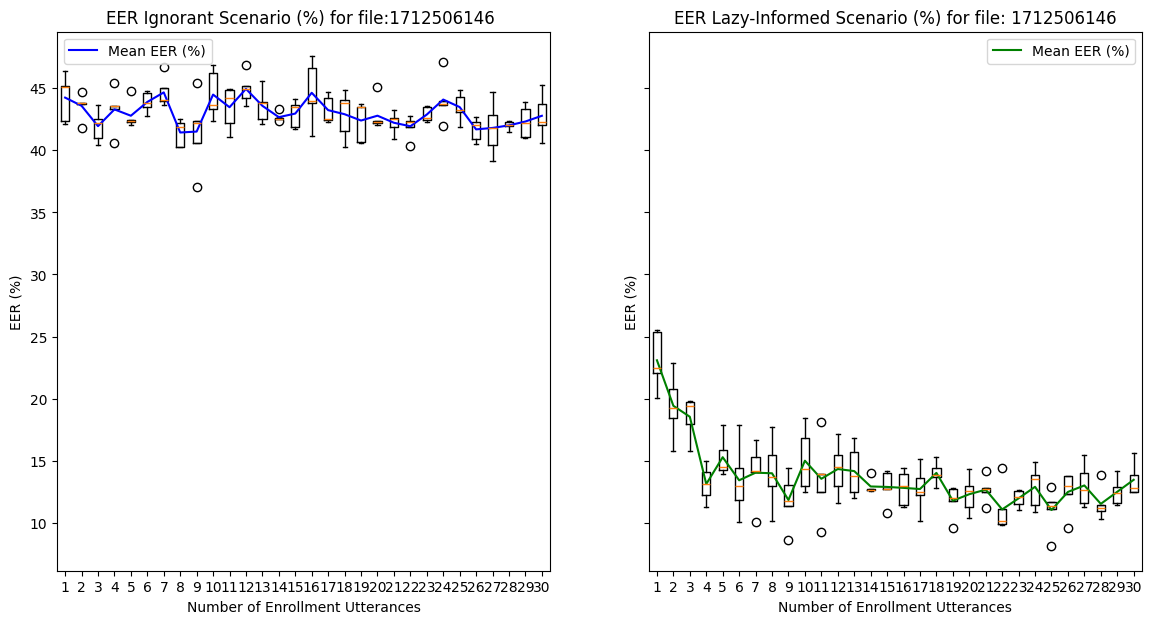

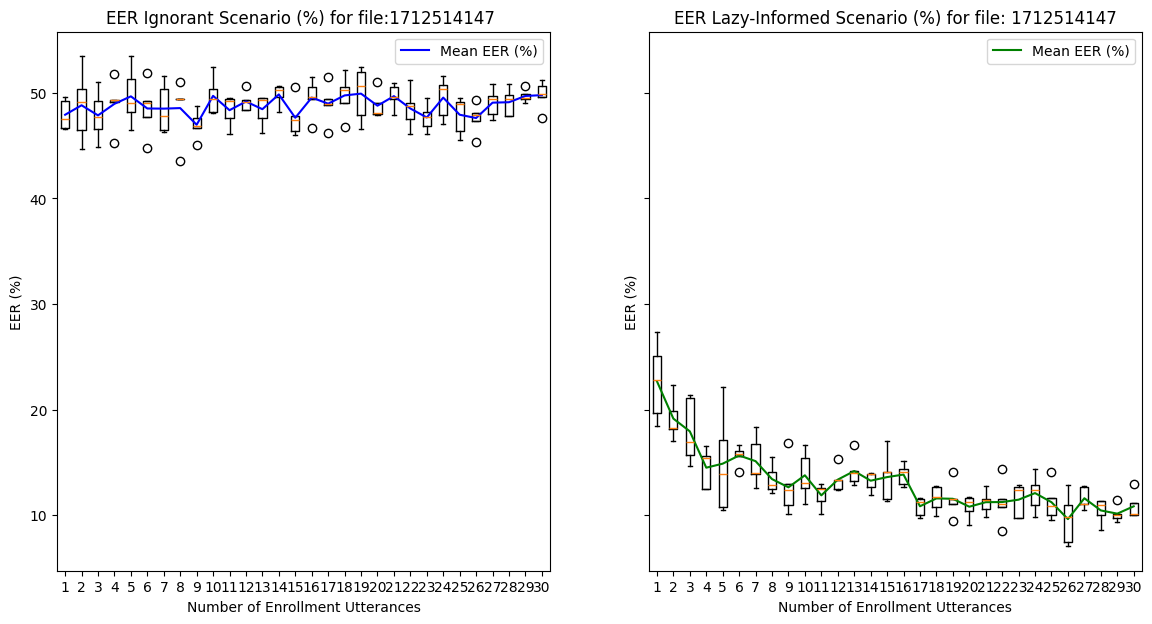

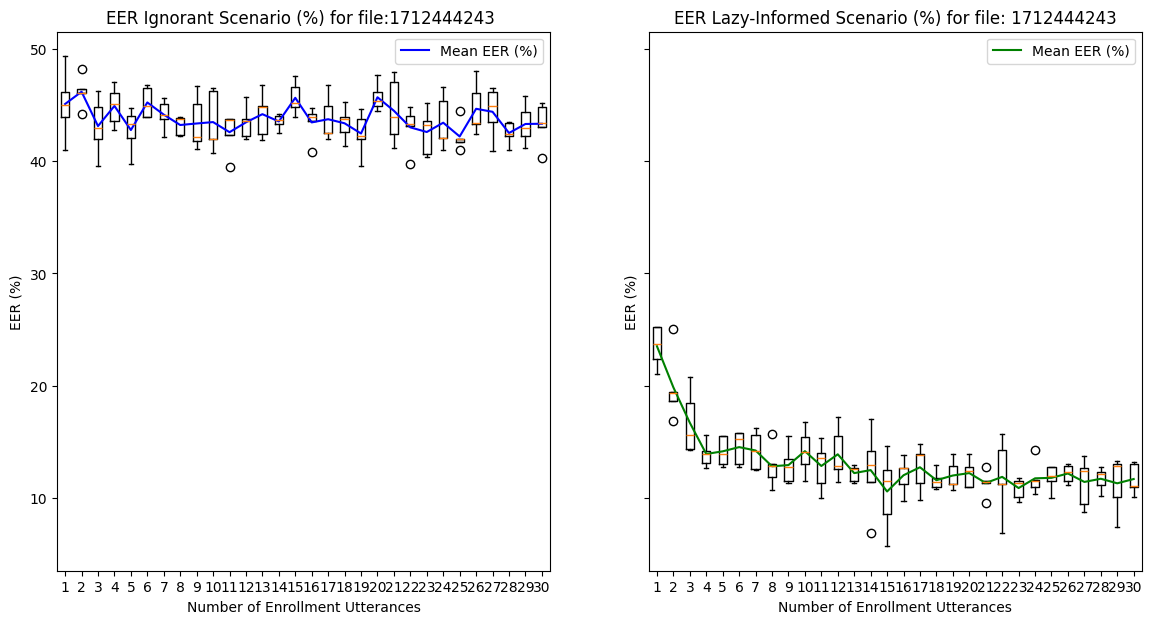

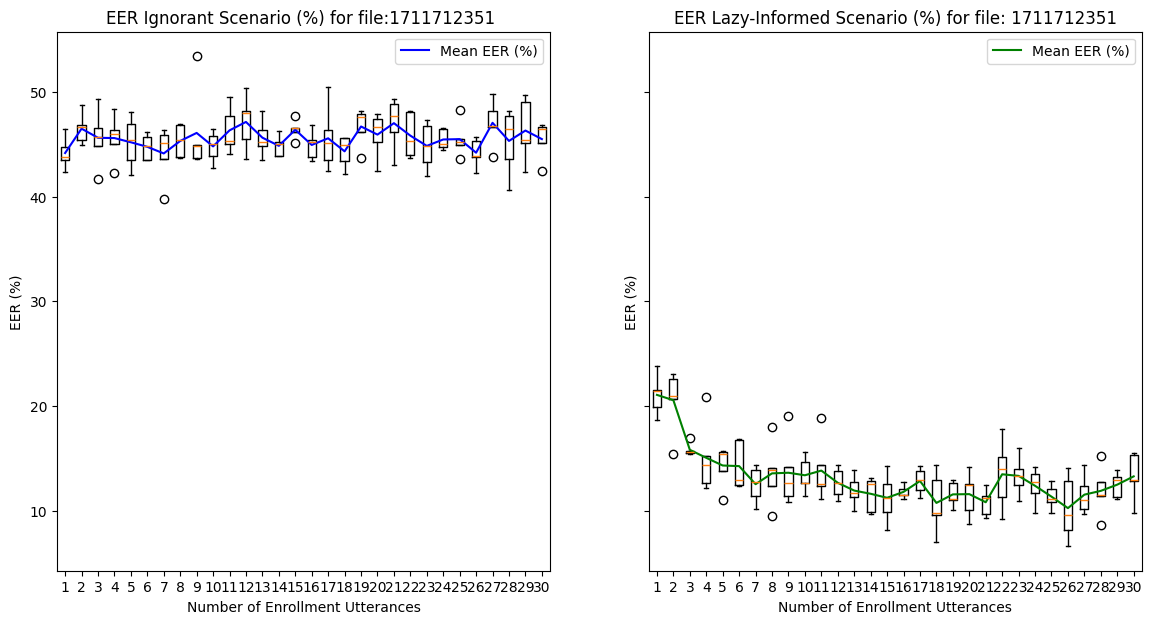

In [31]:
for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    # Adjusting EER values to percentages by multiplying by 100
    # Recalculating groups for plotting
    groups_ig_percent = df.groupby('num_of_enroll')['eer_ignorant'].apply(list)
    groups_lz_percent = df.groupby('num_of_enroll')['eer_lazy-informed'].apply(list)
    
    # Recalculating means for both scenarios across different numbers of enrolls
    mean_ignorant_percent =df.groupby('num_of_enroll')['eer_ignorant'].mean()
    mean_lazy_informed_percent = df.groupby('num_of_enroll')['eer_lazy-informed'].mean()
    
    # Plotting updated data with mean lines reflecting EER percentages
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)
    
    # Ignorant scenario with mean line
    axs[0].boxplot(groups_ig_percent, labels=groups_ig_percent.index)
    axs[0].plot(range(1, len(mean_ignorant_percent) + 1), mean_ignorant_percent, color='blue', label='Mean EER (%)')
    axs[0].set_title(f"EER Ignorant Scenario (%) for file:{df['file'].iloc[0]} ")
    axs[0].set_xlabel('Number of Enrollment Utterances')
    axs[0].set_ylabel('EER (%)')
    axs[0].legend()

    # Lazy-informed scenario with mean line
    axs[1].boxplot(groups_lz_percent, labels=groups_lz_percent.index)
    axs[1].plot(range(1, len(mean_ignorant_percent) + 1), mean_lazy_informed_percent, color='green', label='Mean EER (%)')
    axs[1].set_title(f"EER Lazy-Informed Scenario (%) for file: {df['file'].iloc[0]}")
    axs[1].set_xlabel('Number of Enrollment Utterances')
    axs[1].set_ylabel('EER (%)')
    axs[1].legend()


Averaging over 5 different target selections

In [32]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [33]:
# Aggregate and calculate overall mean and standard deviation for each number of enrolls
overall_stats = full_df.groupby('num_of_enroll').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

overall_stats.to_csv('overal_stats/overall_stats_knnvc_tco_enrolls.csv', index=True)

# Display the overall statistics in a table
print("Overall Statistics for ls-test-clean and other:")
display(overall_stats)

Overall Statistics for ls-test-clean and other:


eer_ignorant           eer_lazy-informed          
                      mean       std              mean       std
num_of_enroll                                                   
1                45.282897  2.275276         22.935614  2.605239
2                46.000402  2.544286         19.398390  2.867075
3                44.388732  2.979511         16.784708  2.530633
4                45.447887  2.650715         14.163380  2.354556
5                44.705835  3.294196         14.435010  2.586941
6                45.057143  2.553365         13.941650  2.660405
7                44.769819  2.690351         13.727565  2.085686
8                44.342052  2.907772         13.068410  2.250169
9                44.232998  3.295994         12.912274  2.364877
10               45.064789  3.030687         13.580282  2.177924
11               44.648692  2.910622         12.922334  2.399240
12               45.580282  2.725858         13.223742  1.778412
13               44.985513  2.474287         12.875252  1.849472
14               45.053924  2.971269         12.226559  1.981316
15               45.445875  2.239112         11.903823  2.402795
16               45.189940  2.779360         12.653119  1.423356
17               45.107445  2.834761         12.156942  1.887228
18               44.735614  3.006852         11.933602  1.910888
19               44.979879  3.492769         11.625352  1.216750
20               45.585111  2.461897         11.786318  1.603014
21               45.342857  3.261893         11.127565  1.506543
22               44.667203  2.981912         11.675654  2.511418
23               44.197586  2.446922         11.701811  1.597610
24               45.291348  2.839327         11.853924  1.710157
25               44.680080  2.384410         11.308249  1.397734
26               44.401207  2.638316         10.910262  2.372922
27               45.304628  3.084445         11.846278  1.677986
28               44.270825  3.179983         11.345272  1.491335
29               44.975050  3.236826         11.480080  1.773326
30               44.896982  3.092521         12.290141  1.850042

In [34]:
full_df = full_df[(full_df['num_of_enroll'] % 5 == 0) | (full_df['num_of_enroll'] == 1)]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_enroll').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})

# Display the resulting statistics
display(overall_stats)

eer_ignorant           eer_lazy-informed          
                      mean       std              mean       std
num_of_enroll                                                   
1                45.282897  2.275276         22.935614  2.605239
5                44.705835  3.294196         14.435010  2.586941
10               45.064789  3.030687         13.580282  2.177924
15               45.445875  2.239112         11.903823  2.402795
20               45.585111  2.461897         11.786318  1.603014
25               44.680080  2.384410         11.308249  1.397734
30               44.896982  3.092521         12.290141  1.850042

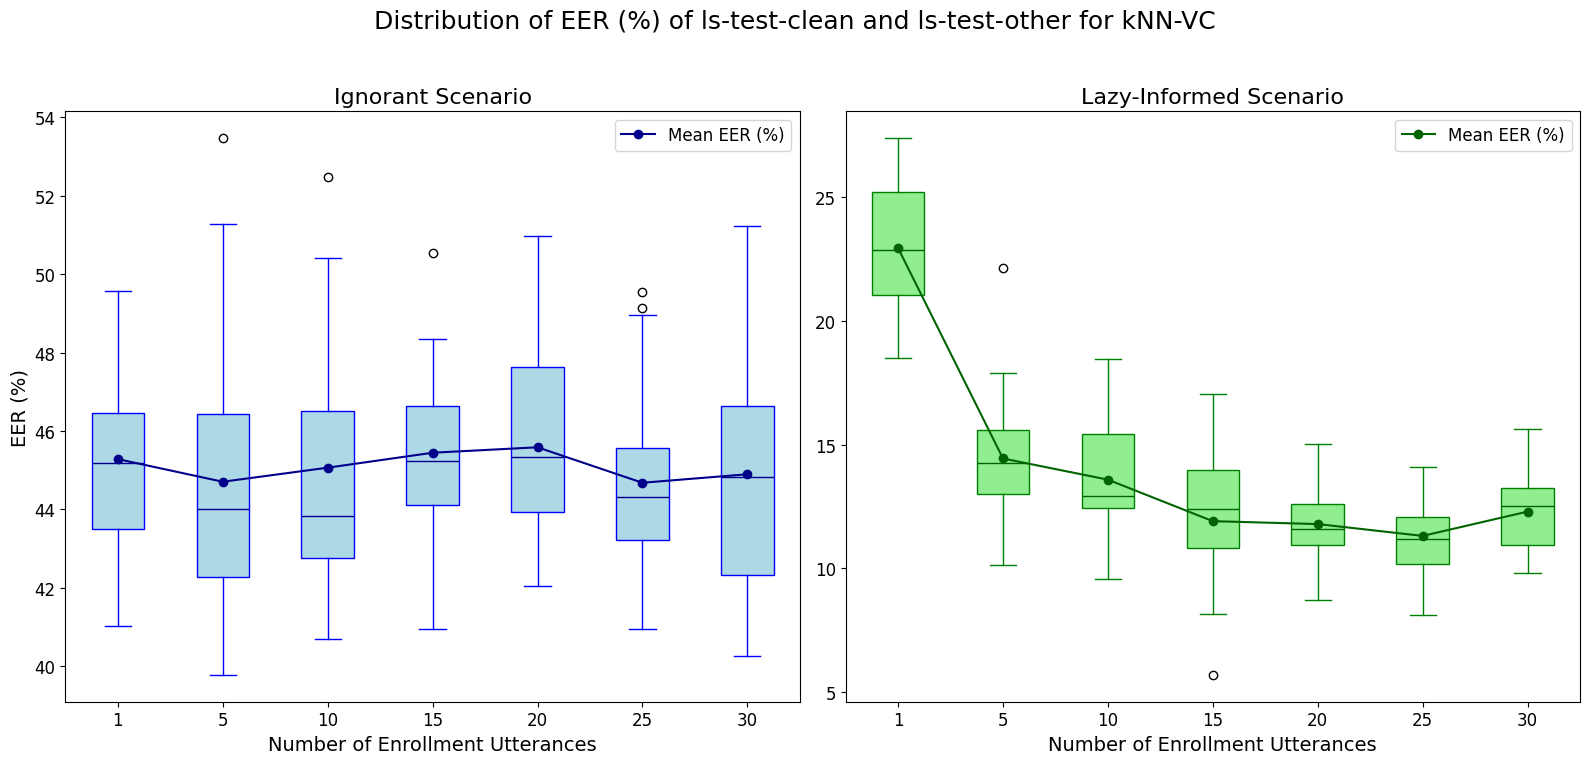

In [36]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# Customizing the overall appearance
plt.suptitle('Distribution of EER (%) of ls-test-clean and ls-test-other for kNN-VC', fontsize=18, fontweight='normal')

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_enroll')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_enroll')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightblue', color='blue'),
               medianprops=dict(color='darkblue'),
               whiskerprops=dict(color='blue'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('Number of Enrollment Utterances', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_enroll')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_enroll')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightgreen', color='green'),
               medianprops=dict(color='darkgreen'),
               whiskerprops=dict(color='green'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Lazy-Informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('Number of Enrollment Utterances', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('overal_stats/knnvc_tco_enrolls.png')
plt.savefig('overal_stats/knnvc_tco_enrolls.pdf')  
plt.show()


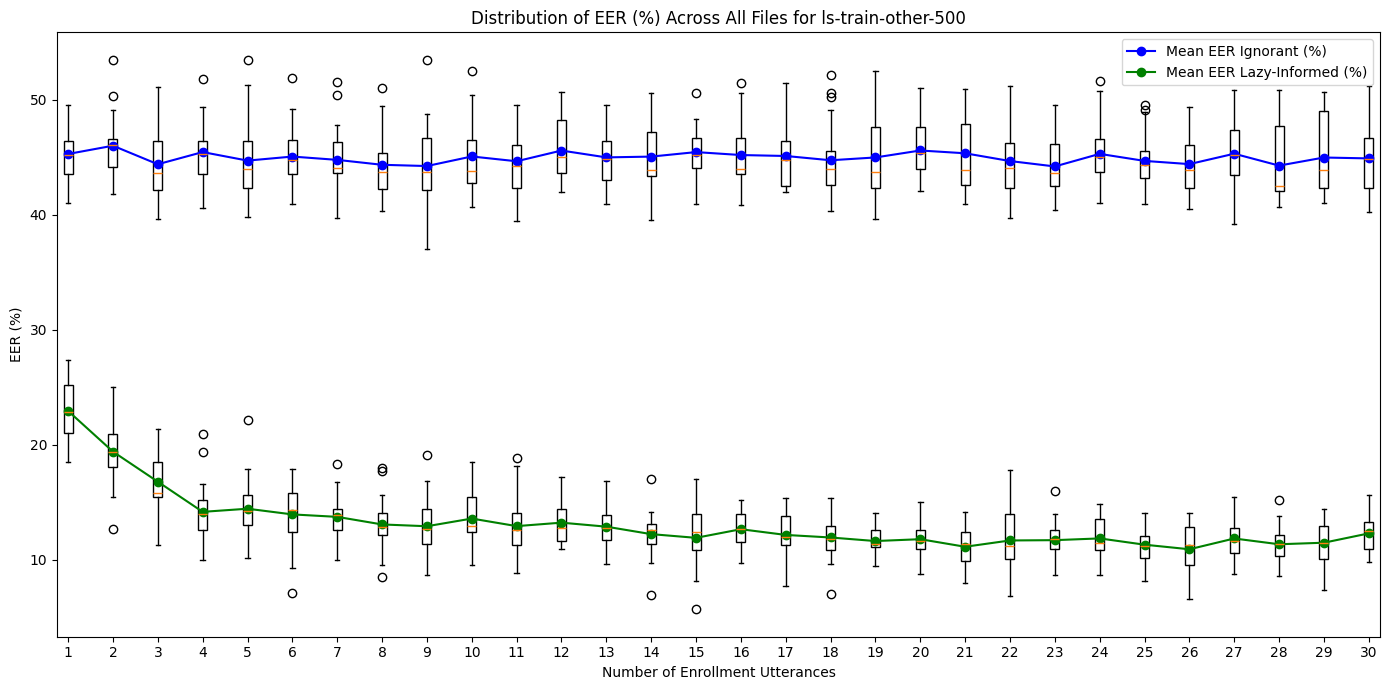

In [39]:
# Prepare data for plotting
ignorant_means = full_df.groupby('num_of_enroll')['eer_ignorant'].mean().values
lazy_informed_means = full_df.groupby('num_of_enroll')['eer_lazy-informed'].mean().values

# Getting unique number of enroll for plotting
unique_enroll = sorted(full_df['num_of_enroll'].unique())

# Prepare box plot data
ignorant_data = [full_df[full_df['num_of_enroll'] == speaker]['eer_ignorant'].values for speaker in unique_enroll]
lazy_informed_data = [full_df[full_df['num_of_enroll'] == speaker]['eer_lazy-informed'].values for speaker in unique_enroll]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 7))

# Position of bars on the x-axis
positions_ignorant = np.array(range(len(unique_enroll))) * 2.0 
positions_lazy_informed = np.array(range(len(unique_enroll))) * 2.0 

# Plotting box plots
bp_ignorant = ax.boxplot(ignorant_data, positions=positions_ignorant, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_enroll)
bp_lazy_informed = ax.boxplot(lazy_informed_data, positions=positions_lazy_informed, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_enroll)

# Plotting mean lines
ax.plot(positions_ignorant, ignorant_means, color='blue', marker='o', linestyle='-', label='Mean EER Ignorant (%)')
ax.plot(positions_lazy_informed , lazy_informed_means, color='green', marker='o', linestyle='-', label='Mean EER Lazy-Informed (%)')

# Customizing the plot
ax.set_title('Distribution of EER (%) Across All Files for ls-train-other-500')
ax.set_xlabel('Number of Enrollment Utterances')
ax.set_ylabel('EER (%)')
ax.legend()

plt.xticks(np.arange(min(positions_ignorant), max(positions_lazy_informed)+1, 2.0), labels=unique_enroll)
plt.tight_layout()
plt.show()

### 2. Evaluation with ls-train-other-500 (795 from the 1166 enroll)
The speakers with less than 120 utterances are filtered out from the dataset

In [39]:
file_pattern = "results_knnvc_enroll/ls-train-other-500/knnvc_to500_num_enrolls#*.txt" 

Individual Evaluation for different target selections

In [41]:
all_files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
dfs = []

for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    # Calculating mean and standard deviation for EER in both scenarios
    eer_ignorant_stats = df.groupby('num_of_enrolls')['eer_ignorant'].agg(['mean', 'std'])
    eer_lazy_informed_stats = df.groupby('num_of_enrolls')['eer_lazy-informed'].agg(['mean', 'std'])
    
     # Enhancing clarity by specifying scenario names
    eer_ignorant_stats.columns = pd.MultiIndex.from_product([['Ignorant'], eer_ignorant_stats.columns])
    eer_lazy_informed_stats.columns = pd.MultiIndex.from_product([['Lazy-Informed'], eer_lazy_informed_stats.columns])

    # Combining both stats into a single DataFrame for a unified table
    combined_stats = pd.concat([eer_ignorant_stats, eer_lazy_informed_stats], axis=1)

    print(f"\nStatistics for file: {df['file'].iloc[0]}")
    display(combined_stats)


Statistics for file: 1712601441


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1               41.246026  0.356150     12.389342  0.495441
2               40.816861  0.652304      8.042729  0.466847
3               40.829980  0.807685      7.122937  0.244446
4               40.648210  0.254682      6.146366  0.424630
5               40.988165  0.415411      6.228476  0.276204
6               40.374927  0.642209      5.694601  0.326388
7               40.510830  0.316911      5.490310  0.447793
8               40.326932  0.656912      5.166269  0.483098
9               40.596514  0.522830      5.041802  0.302821
10              40.548248  0.362380      4.948796  0.414525
11              40.300695  0.349885      4.940951  0.337968
12              40.418031  0.364110      4.680342  0.254551
13              40.514483  0.562926      4.783147  0.381556
14              40.078791  0.375135      5.154072  0.438699
15              40.935595  0.297126      4.877137  0.531524
16              40.519359  0.659638      4.763056  0.500982
17              40.312289  0.319346      4.661601  0.394919
18              40.253001  0.450626      4.683820  0.166078
19              40.490755  0.536235      4.671448  0.406981
20              40.569371  0.291761      4.660664  0.278650
21              40.527633  0.677627      4.690856  0.417116
22              40.237119  0.346274      4.593023  0.292531
23              40.517183  0.281166      4.757910  0.424977
24              40.581442  0.362558      4.465808  0.500947
25              40.395606  0.315362      4.315278  0.312903
26              40.370401  0.510372      4.696510  0.377348
27              39.990709  0.458499      4.478672  0.381853
28              40.321611  0.337683      4.481975  0.371742
29              40.409534  0.482327      4.596279  0.501167
30              40.703495  0.467202      4.791453  0.351610
31              40.193491  0.546564      4.589290  0.459081
32              40.313813  0.311810      4.374597  0.357325
33              40.363937  0.629209      4.483310  0.568487
34              40.165840  0.550494      4.467078  0.398661
35              40.793451  0.419412      4.503210  0.338303
36              40.414458  0.837402      4.324743  0.376051
37              40.065879  0.478554      4.416796  0.235304
38              40.287878  0.229000      4.523698  0.488426
39              40.765387  0.664389      3.968366  0.397865
40              40.346451  0.221517      4.475972  0.498049
41              40.463025  0.336006      4.732689  0.393648
42              40.241693  0.120255      4.646116  0.487915
43              40.290483  0.433129      4.184632  0.378873
44              40.037355  0.338837      4.269521  0.217701
45              40.225064  0.503875      4.537547  0.313303
46              40.391921  0.526553      4.281020  0.553749
55              40.472665  0.107974      4.459232  0.196516
60              40.419000  0.377242      4.672099  0.402303
65              40.697380  0.506271      4.536880  0.307864
70              40.333825  0.350667      4.376503  0.348507
75              40.369496  0.684870      4.368165  0.259660
80              40.403261  0.425557      4.416319  0.241768
85              40.579075  0.646582      4.522745  0.392291
90              40.472840  0.224055      4.403073  0.519968


Statistics for file: 1712601353


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1               40.669428  0.393152     12.140820  0.622221
2               39.712980  0.421129      7.991668  0.707537
3               39.713472  0.402922      6.844270  0.331285
4               39.955403  0.796657      6.376401  0.288259
5               39.706262  0.319846      5.467091  0.152806
6               39.548728  0.322787      5.685310  0.375171
7               39.754845  0.506898      5.361698  0.195916
8               39.941713  0.467885      5.135617  0.216710
9               39.572043  0.425553      4.827108  0.415677
10              39.811623  0.364119      5.323676  0.601220
11              39.960136  0.616204      4.921924  0.366615
12              39.834477  0.680951      4.558193  0.484286
13              39.679485  0.742901      4.988851  0.119460
14              39.554398  0.384993      4.314579  0.209389
15              39.609921  0.348533      4.875247  0.295332
16              39.776301  0.370592      4.661887  0.473044
17              39.571915  0.482114      4.644433  0.257340
18              39.846071  0.273760      4.908615  0.520745
19              39.976733  0.314420      4.725828  0.244612
20              39.250399  0.341226      4.686997  0.286404
21              39.679485  0.335337      4.604362  0.299203
22              39.656249  0.767564      4.509197  0.411593
23              39.282227  0.244535      4.569136  0.284160
24              39.649865  0.481007      4.682089  0.354771
25              39.678611  0.072835      4.753654  0.230754
26              39.945779  0.231280      4.728544  0.388170
27              39.722668  0.243310      4.509277  0.302485
28              39.693492  0.373260      4.388462  0.380999
29              39.510087  0.406070      4.517631  0.273650
30              39.989375  0.140981      4.656884  0.303768
31              39.605840  0.414200      4.683233  0.218484
32              39.653009  0.381895      4.434155  0.532183
33              39.714234  0.422901      3.810848  0.245039
34              39.725130  0.605043      4.500812  0.211651
35              39.648372  0.442765      4.641304  0.269183
36              39.577061  0.546174      4.135143  0.116400
37              39.938918  0.312565      4.444129  0.528333
38              39.649055  0.317683      4.265329  0.356904
39              39.635142  0.817805      4.674132  0.172706
40              39.917334  0.372057      4.737343  0.396882
41              39.596819  0.581080      4.354220  0.203594
42              39.973509  0.454601      4.506037  0.514432
43              39.468635  0.476647      4.056702  0.578658
44              39.696844  0.431355      4.473717  0.192914
45              39.656773  0.664002      4.100775  0.271586
46              39.895528  0.698725      4.516424  0.374725
47              39.847453  0.193597      4.407108  0.356538
48              39.480276  0.188263      4.278908  0.219864
49              39.617656  0.168803      4.215856  0.229191
50              39.397102  0.447218      4.446463  0.360222
55              39.569994  0.108008      4.284832  0.192817
60              39.693080  0.332484      3.972495  0.435137
65              39.819818  0.197947      4.134858  0.610640
70              39.780717  0.290059      4.157632  0.385682
75              39.401168  0.260569      4.217222  0.345192
80              39.284784  0.428788      4.156902  0.270046
85              39.675038  0.327447      4.053719  0.296027
90              39.952020  0.359100      4.212727  0.419063
95              39.582953  0.464576      4.458740  0.224074
100             39.598454  0.438156      4.406202  0.304244


Statistics for file: 1712601399


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1               41.193313  0.749487     12.339107  0.800020
2               40.647813  0.538452      8.460458  0.870445
3               40.525838  0.514899      6.730920  0.295222
4               41.035795  0.473117      6.543782  0.654057
5               40.431531  0.385839      5.794531  0.457504
6               40.511529  0.515550      5.467996  0.526885
7               40.879119  0.528178      5.262419  0.363175
8               40.574787  0.366780      5.124753  0.196684
9               40.834125  0.384078      5.440727  0.316580
10              40.529777  0.349242      5.007115  0.186389
11              40.317990  0.453056      4.985373  0.526231
12              40.654753  0.450902      5.179594  0.378613
13              40.411790  0.448998      4.754035  0.315362
14              40.377135  0.409093      4.780748  0.233034
15              40.564289  0.441925      4.639843  0.572222
16              40.784541  0.195288      4.629281  0.418401
17              40.562732  0.647617      4.779668  0.280531
18              40.480066  0.193669      4.686759  0.284310
19              40.587254  0.217350      4.621356  0.369957
20              40.473571  0.188529      4.555351  0.278791
21              40.828630  0.293583      4.637127  0.375292
22              40.380899  0.377012      4.482563  0.216257
23              40.161902  0.758307      4.414794  0.483129
24              40.185375  0.393325      4.253766  0.282267
25              40.492169  0.441346      4.682343  0.444940
26              40.128676  0.663863      4.643702  0.162603
27              40.269963  0.520234      4.881314  0.510049
28              40.077393  0.218200      4.649563  0.453506
29              40.202480  0.731380      4.504274  0.502172
30              40.203989  0.131421      4.431042  0.437444
31              40.682118  0.143266      4.573123  0.435358
32              40.625609  0.217329      4.528955  0.315773
33              40.591415  0.698997      4.529479  0.094085
34              40.563400  0.279980      4.310989  0.326306
35              40.530270  0.332331      4.594309  0.320473
36              40.398687  0.368649      4.370356  0.523899
37              40.853596  0.463841      4.296251  0.414405
38              40.552377  0.378864      4.572853  0.453073
39              40.040325  0.628346      4.266901  0.276856
40              40.605852  0.431560      4.486581  0.465116
41              40.280143  0.582451      4.182520  0.368275
42              40.288799  0.521516      4.503813  0.300751
43              40.235721  0.409383      4.308877  0.258576
44              40.311558  0.474291      4.490774  0.290588
45              40.461500  0.316643      4.637127  0.471922
46              40.197747  0.205649      4.583366  0.161739
47              40.237087  0.390416      4.290470  0.329205
48              40.173575  0.328914      4.603743  0.367515
49              40.507320  0.390461      4.605903  0.132411
50              40.487690  0.548639      4.431264  0.234957
55              39.971301  0.470128      4.520712  0.387099
60              39.849946  0.729275      4.500176  0.642588
65              40.630723  0.498976      4.397419  0.232473
70              39.994743  0.472592      4.286468  0.335251
75              40.347785  0.568590      4.420099  0.177898
80              40.590399  0.397135      4.366513  0.215973
85              39.940903  0.453249      4.357111  0.401671
90              40.264039  0.393419      4.223130  0.231628
95              40.414744  0.315374      4.767709  0.602064
100             40.272779  0.186376      4.859455  0.700421


Statistics for file: 1712611492.0


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1.0             41.620461  0.572985     11.628417  0.834908
2.0             42.052531  0.344120      8.065631  0.511758
3.0             41.183323  0.692177      6.456161  0.403929
4.0             40.647654  0.406132      6.148272  0.205969
5.0             41.142236  0.482391      6.241070  0.187512
6.0             40.902529  0.440358      5.728001  0.372000
7.0             41.161263  0.265361      5.240359  0.506503
8.0             40.824389  0.591929      5.167460  0.424161
9.0             40.878658  0.412381      5.128406  0.380689
10.0            41.101562  0.638198      4.889175  0.573239
11.0            41.010892  0.221530      4.746364  0.257169
12.0            40.704035  0.514579      4.989724  0.277752
13.0            41.096893  0.363285      4.804413  0.382548
14.0            41.231684  0.479616      4.471192  0.320001
15.0            41.060793  0.501075      4.671242  0.457791
16.0            41.055171  0.842384      4.875850  0.340568
17.0            40.641793  0.683055      4.823948  0.329969
18.0            40.840351  0.159872      4.202849  0.172925
19.0            40.994803  0.363413      4.992869  0.451255
20.0            40.745852  0.588370      4.784862  0.330182
21.0            40.574723  0.336198      4.769822  0.607053
22.0            41.117127  0.297344      4.467221  0.140192
23.0            40.695745  0.475163      4.374978  0.419990
24.0            40.611347  0.252300      4.584272  0.283763
25.0            41.387010  0.609358      4.582096  0.384579
26.0            41.042402  0.236997      4.293567  0.242921
27.0            40.981653  0.515406      4.696415  0.362076
28.0            40.956210  0.261179      4.612716  0.426587
29.0            41.284921  0.477054      4.314881  0.284003
30.0            41.061984  0.640574      4.246048  0.139079
31.0            41.031173  0.536389      4.509118  0.379196
32.0            40.665076  0.371939      4.609238  0.362728
33.0            40.632868  0.399573      4.309163  0.181463
34.0            41.117222  0.356621      4.210170  0.269811
35.0            40.746567  0.399359      4.389177  0.207750
36.0            40.748171  0.481063      4.410506  0.473709
37.0            41.228174  0.496044      4.375741  0.260852
38.0            41.092843  0.353946      4.368879  0.257602
39.0            40.680609  0.291753      4.035166  0.374805
40.0            41.115285  0.387692      4.293122  0.363708
41.0            41.117270  0.652373      4.194939  0.281994
42.0            40.901576  0.513616      4.166129  0.256421
43.0            40.980287  0.265282      4.424514  0.438591
44.0            40.663139  0.524874      4.307607  0.426421
45.0            40.788257  0.461128      4.204818  0.567625
46.0            40.778347  0.373229      4.193240  0.348917
47.0            40.656834  0.431430      4.644131  0.352005
48.0            40.887536  0.248549      4.584161  0.522074
49.0            40.569927  0.192692      4.121914  0.309938
50.0            40.637743  0.276363      4.417177  0.202843
55.0            40.434326  0.137543      4.130490  0.237293
60.0            40.605741  0.527579      4.622262  0.338042
65.0            40.818211  0.250993      4.073489  0.192207
70.0            40.572119  0.749165      4.407203  0.416395
75.0            40.499411  0.290783      4.119865  0.302892
80.0            41.180449  0.456330      4.387541  0.447284
85.0            41.076199  0.539819      3.972686  0.363953
90.0            40.706052  0.688908      3.890941  0.275126
95.0            40.828868  0.426194      4.366577  0.402893
100.0           40.882343  0.459156      4.383967  0.320529


Statistics for file: 1711723187.0


Ignorant           Lazy-Informed          
                     mean       std          mean       std
num_of_enrolls                                             
1.0             41.456240  0.381735     12.133165  0.386900
2.0             40.745503  0.838094      8.297779  0.185487
3.0             40.782937  0.263126      6.895283  0.440994
4.0             40.688661  0.799260      6.393061  0.454130
5.0             40.549455  0.558453      5.948555  0.502468
6.0             40.575629  0.296176      5.731098  0.217271
7.0             40.505843  0.792737      5.746488  0.262416
8.0             40.716296  0.479466      5.407438  0.303724
9.0             40.681467  0.553243      5.125293  0.458632
10.0            40.717471  0.768192      5.016470  0.127915
11.0            40.495075  0.372196      4.931326  0.336352
12.0            40.848625  0.490234      4.804270  0.413662
13.0            40.278587  0.735386      4.810194  0.456360
14.0            40.548613  0.180741      4.619689  0.237078
15.0            40.241280  0.589967      5.065482  0.219168
16.0            40.796675  0.605861      4.755623  0.531504
17.0            40.146385  0.225545      4.695684  0.374809
18.0            40.365827  0.494172      4.339593  0.290903
19.0            40.335222  0.464142      4.880059  0.521195
20.0            40.755143  0.604095      4.180995  0.486003
21.0            40.562367  0.414953      4.511373  0.336030
22.0            40.730526  0.615323      4.622325  0.162268
23.0            40.742851  0.688579      4.491171  0.497534
24.0            40.391492  0.307384      4.355046  0.467812
25.0            40.107760  0.640927      4.625295  0.564728
26.0            40.854676  0.341443      4.807700  0.236951
27.0            40.784128  0.696367      4.408092  0.385892
28.0            40.798708  0.279541      4.353283  0.190258
29.0            40.224318  0.356418      4.434981  0.244189
30.0            40.430117  0.237391      4.636428  0.325875
31.0            40.737975  0.207734      4.217889  0.572194
32.0            40.164808  0.390607      4.155742  0.379715
33.0            40.699858  0.258921      4.409966  0.225130
34.0            40.396876  0.218513      4.620991  0.320772
35.0            40.379374  0.387034      4.251622  0.186254
36.0            40.483481  0.242895      4.253814  0.522437
37.0            40.493264  0.452988      4.342499  0.308131
38.0            40.644176  0.295831      4.429485  0.210902
39.0            40.532382  0.479600      4.351409  0.497587
40.0            40.396019  0.130278      4.427722  0.180963
41.0            40.444792  0.736832      4.414667  0.399077
42.0            40.734386  0.445369      4.507863  0.556363
43.0            40.643969  0.584432      4.399738  0.422046
44.0            40.312654  0.361079      4.378933  0.385389
45.0            40.449859  0.265969      4.354871  0.360936
46.0            40.596307  0.345622      4.340101  0.382336
47.0            40.433214  0.367028      4.526223  0.509625
48.0            40.310780  0.552799      4.103459  0.354944
49.0            40.589240  0.438631      4.420099  0.168438
50.0            40.280620  0.451648      4.211727  0.275945
55.0            40.620702  0.506306      4.351552  0.415883
60.0            40.505589  0.401398      4.447686  0.274151
65.0            40.148751  0.291141      4.274905  0.336835
70.0            40.196032  0.654199      4.291867  0.381292
75.0            40.340400  0.633313      4.410824  0.523820
80.0            40.446635       NaN      4.260675       NaN

Aggregate over all the EErs

In [42]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)

In [43]:
# Aggregate and calculate overall mean and standard deviation for each number of enroll
overall_stats = full_df.groupby('num_of_enrolls').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

# Display the overall statistics in a table
print("Overall Statistics for ls-train-other-500:")
display(overall_stats)

Overall Statistics for ls-train-other-500:


eer_ignorant           eer_lazy-informed          
                       mean       std              mean       std
num_of_enrolls                                                   
1.0               41.237093  0.572454         12.126170  0.654815
2.0               40.795138  0.929564          8.171653  0.573294
3.0               40.607110  0.724617          6.809914  0.389783
4.0               40.595145  0.645410          6.321576  0.425760
5.0               40.563530  0.652303          5.935945  0.432031
6.0               40.382668  0.624308          5.661401  0.358457
7.0               40.562380  0.674708          5.420255  0.389712
8.0               40.476823  0.575317          5.200307  0.331659
9.0               40.512561  0.648726          5.112667  0.400671
10.0              40.541736  0.642938          5.037046  0.419209
11.0              40.416958  0.521786          4.905187  0.352890
12.0              40.491984  0.591643          4.842425  0.407392
13.0              40.396247  0.711109          4.828128  0.330833
14.0              40.358124  0.661274          4.668056  0.401643
15.0              40.482376  0.672270          4.825790  0.429346
16.0              40.586409  0.694292          4.737140  0.427246
17.0              40.247023  0.602543          4.721067  0.311002
18.0              40.357063  0.453904          4.564327  0.388445
19.0              40.476954  0.494922          4.778312  0.399293
20.0              40.358867  0.699930          4.573774  0.377943
21.0              40.434568  0.563564          4.642708  0.394190
22.0              40.424384  0.685443          4.534866  0.248826
23.0              40.279981  0.733694          4.521598  0.415053
24.0              40.283904  0.491504          4.468196  0.388023
25.0              40.412231  0.714884          4.591733  0.399174
26.0              40.468387  0.580730          4.634005  0.324916
27.0              40.349824  0.669110          4.594754  0.400534
28.0              40.369483  0.545991          4.497200  0.363743
29.0              40.326268  0.742668          4.473609  0.359231
30.0              40.477792  0.517548          4.552371  0.356471
31.0              40.450119  0.630860          4.514530  0.423499
32.0              40.284463  0.487368          4.420537  0.394986
33.0              40.400462  0.592381          4.308553  0.386731
34.0              40.393694  0.610524          4.422008  0.320725
35.0              40.419607  0.556902          4.475924  0.286471
36.0              40.324372  0.632081          4.298913  0.405303
37.0              40.515966  0.637673          4.375083  0.338244
38.0              40.445266  0.565846          4.432049  0.355217
39.0              40.330769  0.703610          4.259195  0.417777
40.0              40.476188  0.498675          4.484148  0.390886
41.0              40.380410  0.733805          4.375807  0.369704
42.0              40.427992  0.528954          4.465992  0.433471
43.0              40.323819  0.656556          4.274893  0.415198
44.0              40.204310  0.513266          4.384110  0.302057
45.0              40.316291  0.571494          4.367028  0.427459
46.0              40.371970  0.525681          4.382830  0.381638
47.0              40.293647  0.447881          4.466983  0.385572
48.0              40.213042  0.609528          4.392568  0.411470
49.0              40.321036  0.510859          4.340943  0.278948
50.0              40.200789  0.638795          4.376658  0.270722
55.0              40.213798  0.493751          4.349364  0.308705
60.0              40.214671  0.588736          4.442944  0.472608
65.0              40.422977  0.513860          4.283510  0.376701
70.0              40.175487  0.560331          4.303935  0.353224
75.0              40.191652  0.624902          4.307235  0.334751
80.0              40.368624  0.785827          4.328431  0.293886
85.0              40.317804  0.728432          4.226565  0.406317
90.0              40.348738  0.501171          4.182468

In [45]:
# Incrementing by 1 till 10, and by 5 thereafter
condition = (
    (full_df['num_of_enrolls'] % 5 == 0)  # Includes multiples of 5
)

# Apply the condition to filter the DataFrame
full_df = full_df[condition]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_enrolls').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})
overall_stats.to_csv('overal_stats/overall_stats_knnvc_to500_enrolls.csv', index=True)  # Set index=False if you do not want to include the DataFrame index as a column in the CSV file

# Display the resulting statistics
display(overall_stats)


eer_ignorant           eer_lazy-informed          
                       mean       std              mean       std
num_of_enrolls                                                   
5.0               40.563530  0.652303          5.935945  0.432031
10.0              40.541736  0.642938          5.037046  0.419209
15.0              40.482376  0.672270          4.825790  0.429346
20.0              40.358867  0.699930          4.573774  0.377943
25.0              40.412231  0.714884          4.591733  0.399174
30.0              40.477792  0.517548          4.552371  0.356471
35.0              40.419607  0.556902          4.475924  0.286471
40.0              40.476188  0.498675          4.484148  0.390886
45.0              40.316291  0.571494          4.367028  0.427459
50.0              40.200789  0.638795          4.376658  0.270722
55.0              40.213798  0.493751          4.349364  0.308705
60.0              40.214671  0.588736          4.442944  0.472608
65.0              40.422977  0.513860          4.283510  0.376701
70.0              40.175487  0.560331          4.303935  0.353224
75.0              40.191652  0.624902          4.307235  0.334751
80.0              40.368624  0.785827          4.328431  0.293886
85.0              40.317804  0.728432          4.226565  0.406317
90.0              40.348738  0.501171          4.182468  0.396194
95.0              40.275522  0.655409          4.531009  0.442517
100.0             40.247871  0.695464          4.502247  0.434095

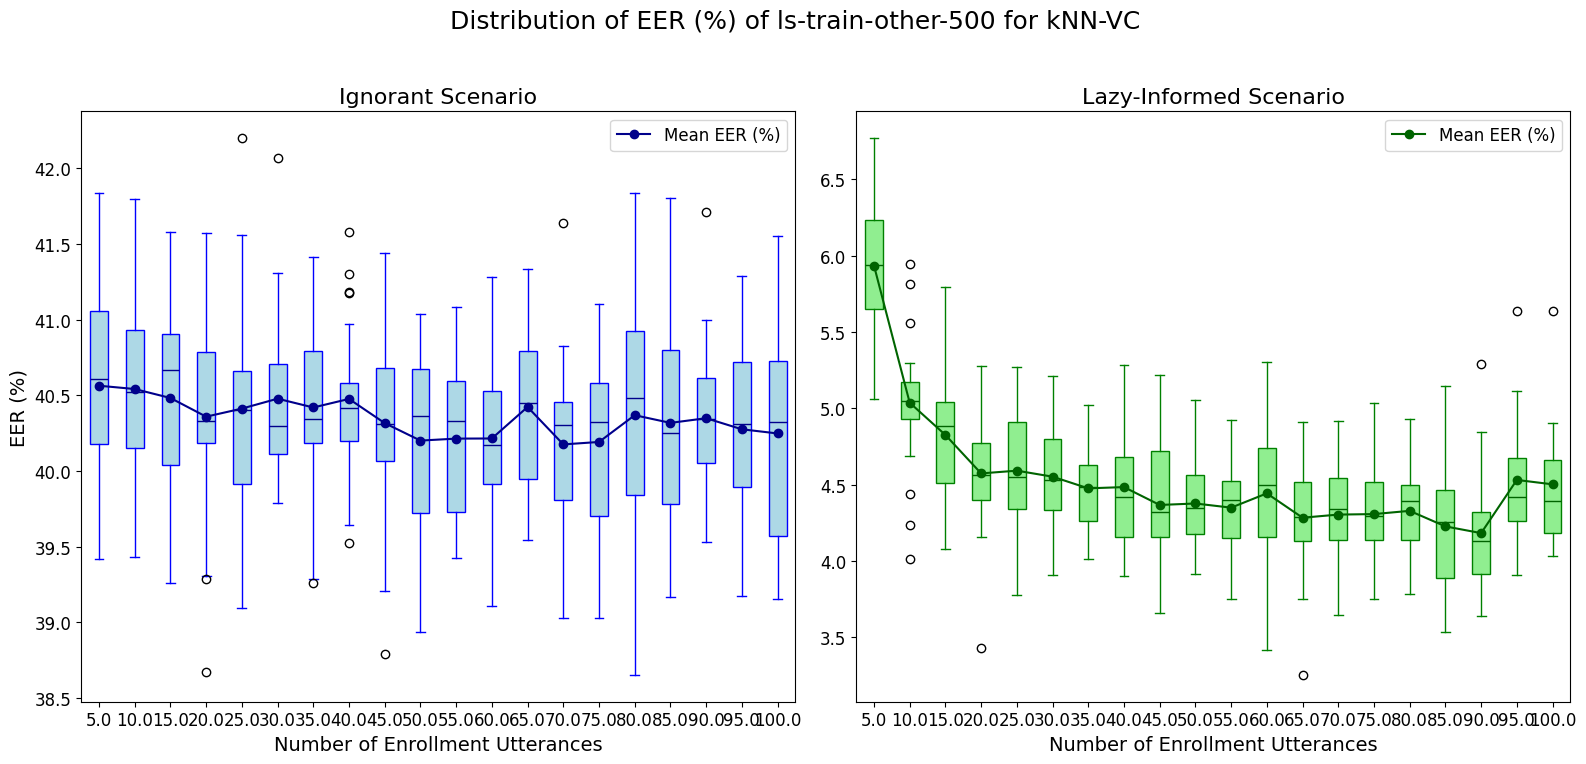

In [46]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# Customizing the overall appearance
plt.suptitle('Distribution of EER (%) of ls-train-other-500 for kNN-VC', fontsize=18, fontweight='normal')

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_enrolls')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_enrolls')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightblue', color='blue'),
               medianprops=dict(color='darkblue'),
               whiskerprops=dict(color='blue'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('Number of Enrollment Utterances', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_enrolls')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_enrolls')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightgreen', color='green'),
               medianprops=dict(color='darkgreen'),
               whiskerprops=dict(color='green'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Lazy-Informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('Number of Enrollment Utterances', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('overal_stats/knnvc_to500_enrolls.png')
plt.savefig('overal_stats/knnvc_to500_enrolls.pdf')  
plt.show()
